# Read data

DataFrames из ZTF, скачанные с помощью модуля https://github.com/MickaelRigault/ztfquery/blob/master/doc/lightcurve.md

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


path = '/home/masha/AstroAugumetation'


data = []
numbers = []
oid = []

for i in range(2531):
    try:
        df_i = pd.read_csv(path + '/DataFramesClean/{}.csv'.format(i))
        mask_g = df_i[df_i['filtercode'] == 'zg'].index.shape[0] > 10
        mask_r = df_i[df_i['filtercode'] == 'zr'].index.shape[0] > 10
        if (mask_g)&(mask_r):
            df_i = df_i[df_i['filtercode'] != 'zi']
            obj_id = df_i.oid.unique()
            oid.append(obj_id)
            data.append(df_i)
            numbers.append(i)
    except FileNotFoundError:
        continue

calculate_flux = lambda x: 10**((x + 48.6) / -2.5)
to_int = lambda x: int(x)
#calculate_error = lambda x: x*
for i in range(len(data)):
    data[i]['mag'] = data[i]['mag'].map(calculate_flux)
    data[i]['magerr'] = data[i]['magerr']*data[i]['mag']
    data[i]['filtercode'][data[i]['filtercode'] == 'zg'] = 0
    data[i]['filtercode'][data[i]['filtercode'] == 'zr'] = 1
    data[i].rename(columns={"oid": "object_id", "mag": \
                            "flux", "magerr": "flux_err", "filtercode": "passband"}, inplace=True)
#     data[i].oid.name = 'object_id'
#     data[i].filtercode.name = 'passband'
#     data[i].mag.name = 'flux'
#     data[i].magerr.name = 'flux_err'
    

print(len(data))
data[0]

<ipython-input-1-ebe51bbe8f42>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]['filtercode'][data[i]['filtercode'] == 'zg'] = 0
<ipython-input-1-ebe51bbe8f42>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]['filtercode'][data[i]['filtercode'] == 'zr'] = 1


192


Unnamed: 0  Unnamed: 0.1        object_id      expid           hjd  \
0             0             0  869111200011489   88945453  2.458644e+06   
1             1             1  869111200011489   89242666  2.458647e+06   
2             2             2  869111200011489   90645164  2.458661e+06   
3             3             3  869111200011489   91345319  2.458668e+06   
4             4             4  869111200011489   91643071  2.458671e+06   
..          ...           ...              ...        ...           ...   
260         281           281  880203100021683  114615907  2.458901e+06   
261         282           282  880203100021683  115111505  2.458906e+06   
262         284           284  880203100021683  126048079  2.459015e+06   
263         285           285  880203100021683  126448175  2.459019e+06   
264         287           287  880203100021683  127339097  2.459028e+06   

              mjd          flux      flux_err  catflags passband  ...  ccdid  \
0    58643.454537  1.680020e-27  6.442315e-29         0        0  ...    0xb   
1    58646.426667  1.602774e-27  6.365950e-29         0        0  ...    0xb   
2    58660.451643  1.758028e-27  6.518707e-29         0        0  ...    0xb   
3    58667.453194  1.686594e-27  6.448777e-29         0        0  ...    0xb   
4    58670.430718  1.519128e-27  6.282299e-29         0        0  ...    0xb   
..            ...           ...           ...       ...      ...  ...    ...   
260  58900.159074  3.617157e-27  8.224280e-29         0        1  ...    0x3   
261  58905.115058  3.865656e-27  8.454445e-29         0        1  ...    0x3   
262  59014.480799  4.034121e-27  8.610795e-29         0        1  ...    0x3   
263  59018.481759  4.003839e-27  8.582669e-29         0        1  ...    0x3   
264  59027.390972  4.250696e-27  8.812201e-29         0        1  ...    0x3   

     qid   limitmag      magzp  magzprms  clrcoeff  clrcounc exptime  airmass  \
0    0x2  20.959999  26.163940  0.033701 -0.076873  0.000014      30    1.756   
1    0x2  21.400000  26.111134  0.032912 -0.071229  0.000013      30    1.790   
2    0x2  21.129999  26.012861  0.042294 -0.060998  0.000022      30    1.689   
3    0x2  21.570000  26.182110  0.027653 -0.073425  0.000009      30    1.663   
4    0x2  21.479999  26.150078  0.028008 -0.059444  0.000009      30    1.681   
..   ...        ...        ...       ...       ...       ...     ...      ...   
260  0x1  19.889999  25.839108  0.031754  0.083683  0.000011      30    1.796   
261  0x1  19.910000  26.203920  0.031311  0.084930  0.000011      30    1.775   
262  0x1  19.830000  26.263489  0.029370  0.080925  0.000010      30    1.745   
263  0x1  20.309999  26.239615  0.023658  0.081920  0.000006      30    1.739   
264  0x1  20.969999  26.097630  0.020045  0.080023  0.000005      30    1.778   

     programid  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
260          1  
261          1  
262          1  
263          1  
264          1  

[265 rows x 26 columns]

In [2]:
data[9].columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'object_id', 'expid', 'hjd', 'mjd',
       'flux', 'flux_err', 'catflags', 'passband', 'ra', 'dec', 'chi', 'sharp',
       'filefracday', 'field', 'ccdid', 'qid', 'limitmag', 'magzp', 'magzprms',
       'clrcoeff', 'clrcounc', 'exptime', 'airmass', 'programid'],
      dtype='object')

DataFrame - список объектов и их параметров из BTS https://sites.astro.caltech.edu/ztf/bts/bts.php

In [3]:
bts = pd.read_csv(path + '/ZTF_BTS.csv')        
bts 

Unnamed: 0         ZTFID       IAUID           RA          Dec    peakt  \
0             79  ZTF21aaabtyq     SN2021G  11:46:39.50  +42:12:01.1  1227.89   
1             80  ZTF21aaabaey     SN2021F  07:55:09.87  +44:07:52.3  1227.93   
2             81  ZTF21aaaawur    SN2021mw  04:41:15.77  +02:51:59.4  1223.74   
3             82  ZTF20adaftef  SN2020adra  10:05:14.80  +21:54:39.4  1220.95   
4             83  ZTF20adaduxg    AT2021ad  05:17:05.74  -06:39:25.3  1226.73   
...          ...           ...         ...          ...          ...      ...   
2526        2605  ZTF18aacemcn   SN2019wmr  09:46:03.55  +33:31:41.7   839.01   
2527        2606  ZTF18aaaqexr   SN2020chl  11:43:06.37  +15:34:01.7   891.92   
2528        2607  ZTF18aaaibml   SN2020buc  10:08:31.27  +09:14:23.0   909.80   
2529        2608  ZTF17aadlxmv   SN2020adv  08:29:47.59  +33:54:22.8   879.69   
2530        2609  ZTF17aaazdba   AT2019azh  08:13:16.95  +22:38:53.9   561.73   

     peakfilt  peakmag peakabs duration    rise    fade   type redshift  \
0           r  17.9018  -18.88   21.648  10.366  11.282  SN Ia  0.05129   
1           g  18.0787  -19.34   22.412   9.991  12.421  SN Ia  0.06569   
2           r  18.3245  -19.26   37.156  11.065  26.091  SN Ia     0.06   
3           g  18.4490  -19.50    40.05  12.064  27.986  SN Ia  0.08402   
4           r  18.6711  -17.31  >59.207  18.287  >40.92  SN II     0.03   
...       ...      ...     ...      ...     ...     ...    ...      ...   
2526        r  18.5951  -17.52   21.317   9.543  11.774  SN II    0.038   
2527        g  18.4475  -19.10   17.228    5.46  11.768  SN Ia   0.0702   
2528        r  18.2606  -17.70    69.73  27.302  42.428  SN II   0.0348   
2529        g  17.9475  -19.34   25.146  10.951  14.195  SN Ia    0.062   
2530        g  15.2769  -19.76    66.42  24.318  42.102    TDE    0.022   

              b    A_V  
0     69.957380  0.052  
1     29.527761  0.113  
2    -27.088137  0.600  
3     52.009583  0.105  
4    -23.988915  0.502  
...         ...    ...  
2526  49.819326  0.035  
2527  70.370720  0.101  
2528  47.637802  0.092  
2529  34.174702  0.106  
2530  27.562336  0.122  

[2531 rows x 16 columns]

In [4]:
bts_ztf_ids = bts.ZTFID.values
bts_iau_ids = bts.IAUID.values

In [5]:
#passband2name = {0: 'zg', 1: 'zr'}
passband2lam  = {0: 0, 1: 1} # green, red 
color = {1: 'red', 0: 'green'}
numbers = np.array(numbers)
data = np.array(data, dtype='object')

In [6]:
#np.array([passband2lam[i] for i in data[27]['filtercode']])
#data[27]['filtercode'].values[6]

In [7]:
def get_object(data, name_in_BTSdf):
    """data - """
    assert isinstance(name_in_BTSdf, str), 'Попробуйте ввести название объекта из ZTF или IAU'
    assert isinstance(data, np.ndarray), 'Маски будут работать неправильно, если это не numpy.ndarray'
    if name_in_BTSdf[:2] == 'ZT':
        num = np.where(bts_ztf_ids == name_in_BTSdf)[0]
        assert np.any(numbers == num[0]), 'Среди отобранных объектов нет объекта с таким ID'
        df_num = data[numbers == num[0]]
        return df_num[0]
    else:
        num = np.where(bts_iau_ids == name_in_BTSdf)[0]
        assert np.any(numbers == num[0]), 'Среди отобранных объектов нет объекта с таким ID'
        df_num = data[numbers == num[0]]
        return df_num[0]
get_object(data, 'ZTF17aaazdba')

Unnamed: 0  Unnamed: 0.1         object_id     expid           hjd  \
0             0             0   567115100000151  45115350  2.458206e+06   
1             2             2   567115100000151  47317356  2.458228e+06   
2             3             3   567115100000151  47922726  2.458234e+06   
3             4             4   567115100000151  48215487  2.458237e+06   
4             5             5   567115100000151  48220684  2.458237e+06   
..          ...           ...               ...       ...           ...   
570         761           761  1613212300009956  73948585  2.458494e+06   
571         762           762  1613212300009956  75428629  2.458509e+06   
572         763           763  1613212300009956  78032460  2.458535e+06   
573         764           764  1613212300009956  78622306  2.458541e+06   
574         766           766  1613212300009956  82822103  2.458583e+06   

              mjd          flux      flux_err  catflags passband  ...  ccdid  \
0    58205.153507  1.414587e-26  1.672468e-28         0        0  ...    0xf   
1    58227.173565  1.381258e-26  1.642456e-28         0        0  ...    0xf   
2    58233.227268  1.360349e-26  1.623638e-28         0        0  ...    0xf   
3    58236.154873  1.300266e-26  1.569611e-28         0        0  ...    0xf   
4    58236.206840  1.353073e-26  1.617091e-28         0        0  ...    0xf   
..            ...           ...           ...       ...      ...  ...    ...   
570  58493.485857  2.152311e-26  1.990573e-28         0        1  ...    0xc   
571  58508.286296  2.034983e-26  1.907435e-28         0        1  ...    0xc   
572  58534.324607  2.850453e-26  2.488951e-28         0        1  ...    0xc   
573  58540.223067  3.340136e-26  2.841765e-28         0        1  ...    0xc   
574  58582.221030  4.091755e-26  3.387599e-28         0        1  ...    0xc   

     qid   limitmag      magzp  magzprms  clrcoeff  clrcounc exptime  airmass  \
0    0x1  19.790001  26.348095  0.039807 -0.079152  0.000045      30    1.033   
1    0x1  21.049999  26.277557  0.031383 -0.080279  0.000012      30    1.148   
2    0x1  20.200001  26.220253  0.037296 -0.065458  0.000030      30    1.556   
3    0x1  20.360001  26.264048  0.034883 -0.069375  0.000023      30    1.168   
4    0x1  20.049999  26.183195  0.037252 -0.042548  0.000033      30    1.449   
..   ...        ...        ...       ...       ...       ...     ...      ...   
570  0x3  21.290001  26.198914  0.021319  0.096456  0.000005      30    1.263   
571  0x3  20.270001  26.241133  0.028532  0.092340  0.000009      30    1.051   
572  0x3  19.030001  26.233915  0.045179  0.115683  0.000035      30    1.088   
573  0x3  21.400000  26.241892  0.021480  0.083379  0.000005      30    1.025   
574  0x3  21.200001  26.169272  0.021830  0.094652  0.000006      30    1.168   

     programid  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
570          2  
571          2  
572          1  
573          1  
574          1  

[575 rows x 26 columns]

In [8]:
data[7].flux_err.min()

3.92690433363131e-29

675


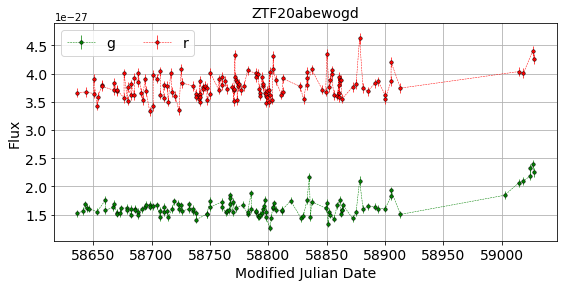

695


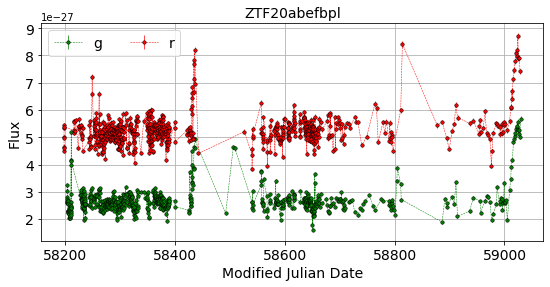

699


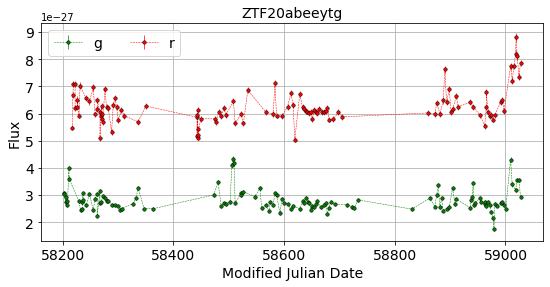

711


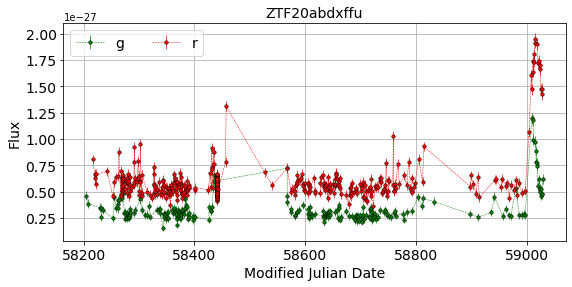

721


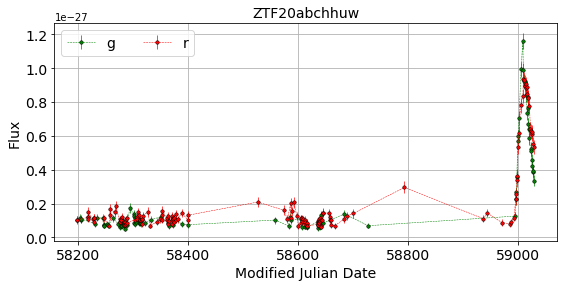

729


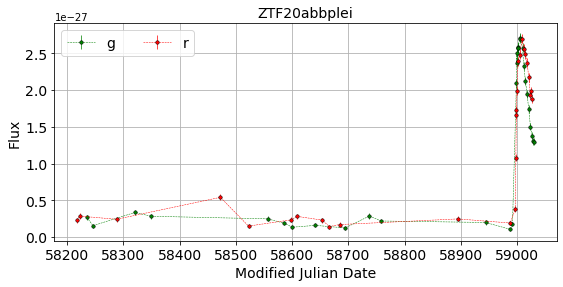

735


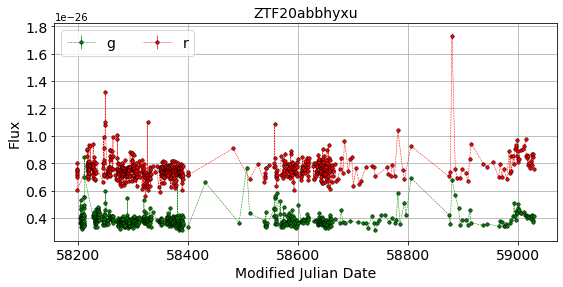

736


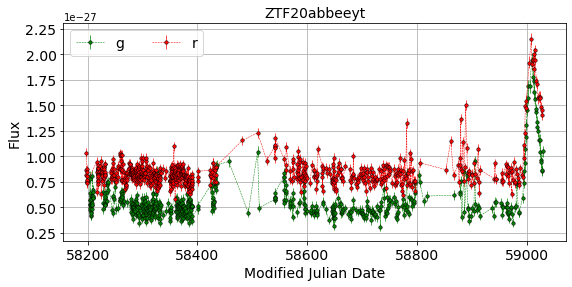

738


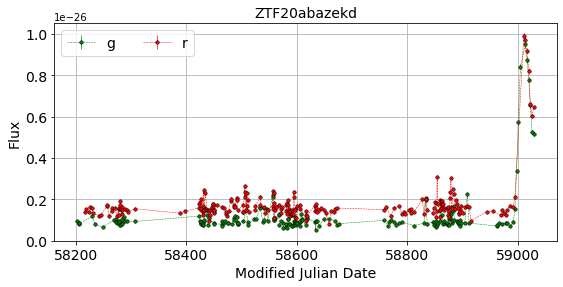

744


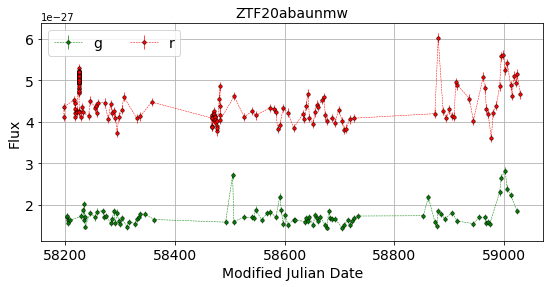

778


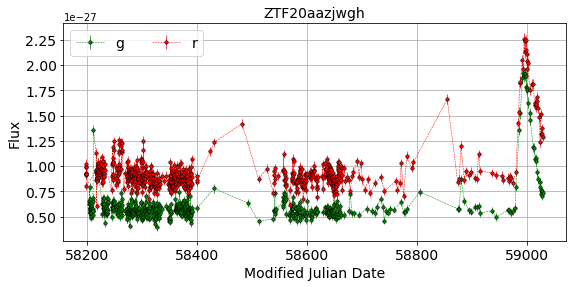

830


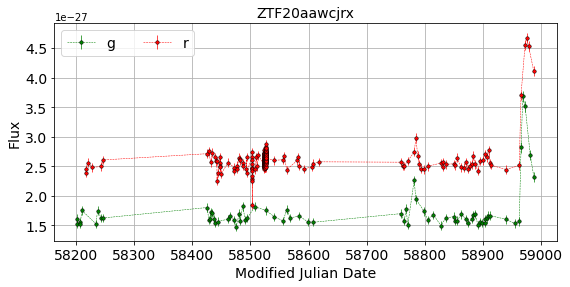

839


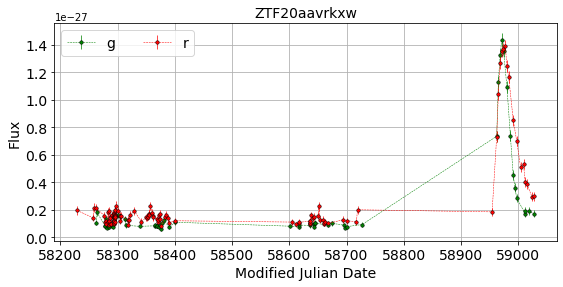

846


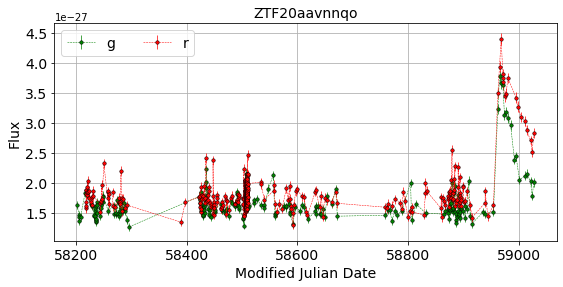

864


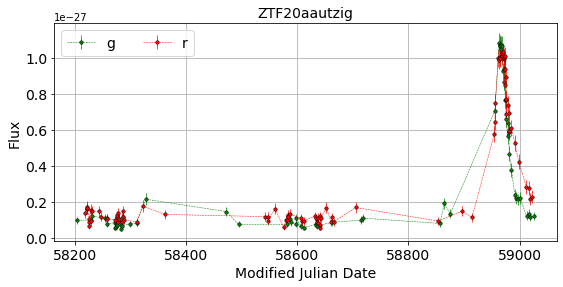

873


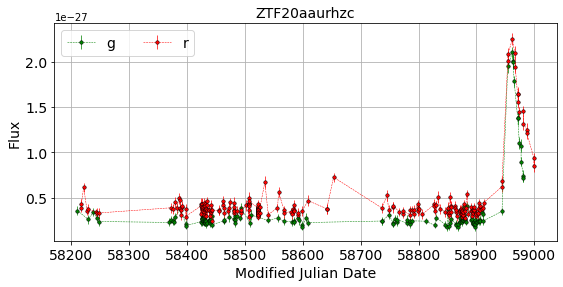

888


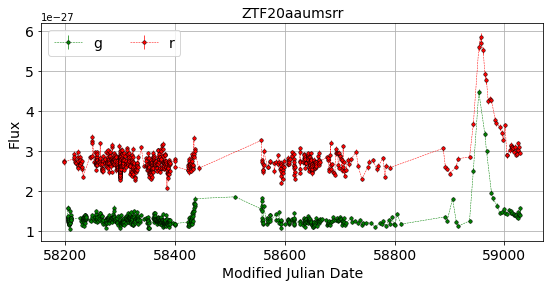

905


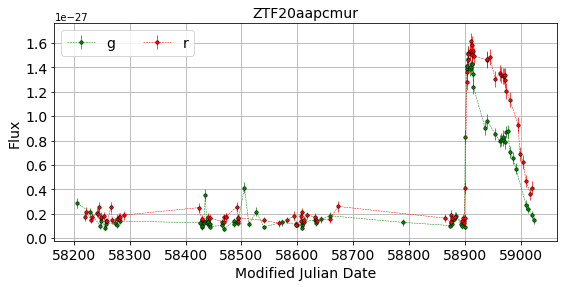

913


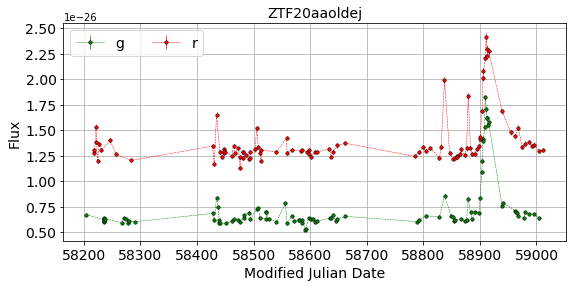

939


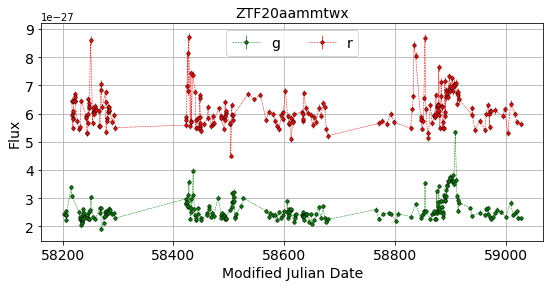

961


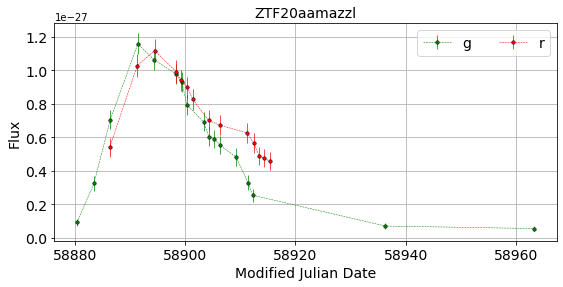

976


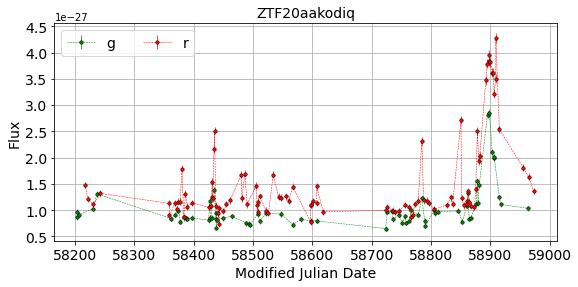

977


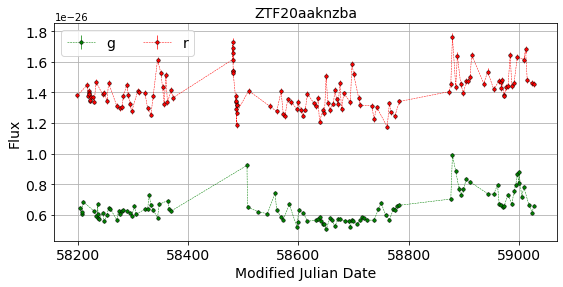

1005


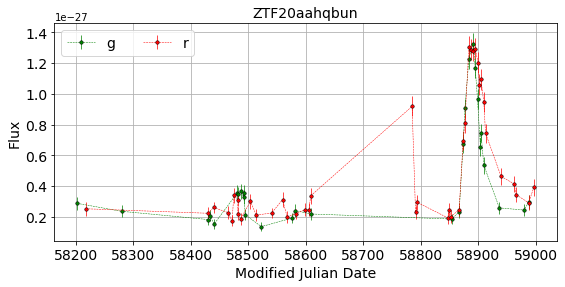

1013


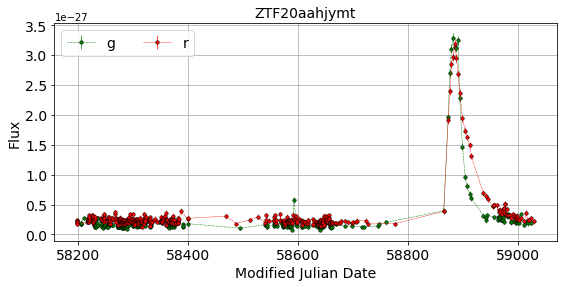

1017


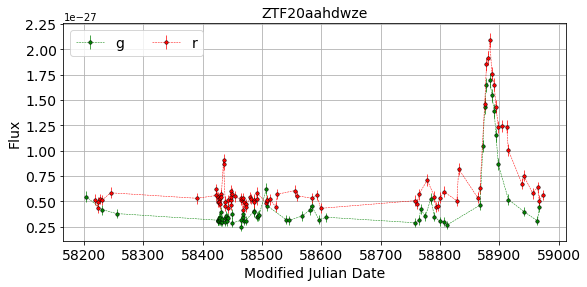

1021


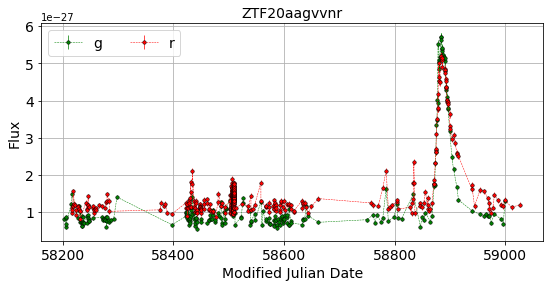

1026


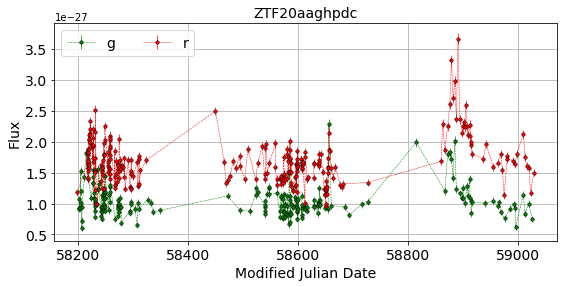

1027


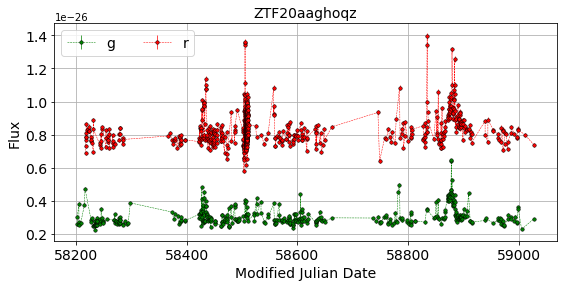

1031


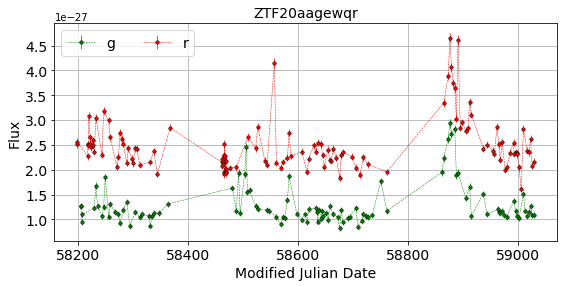

1040


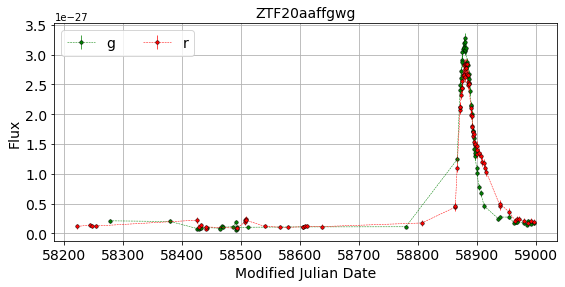

1056


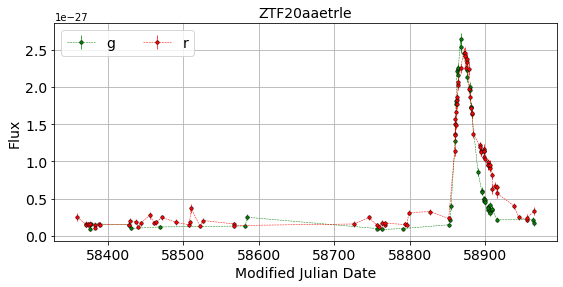

1064


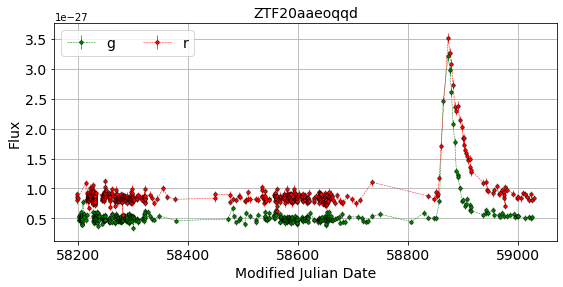

1081


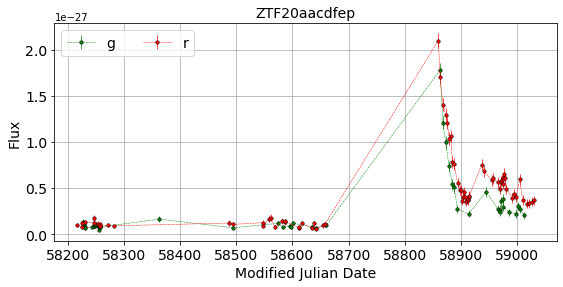

1092


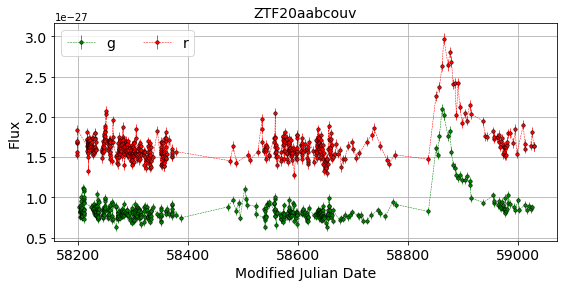

1102


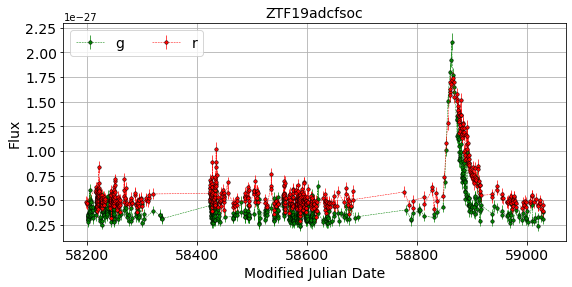

1115


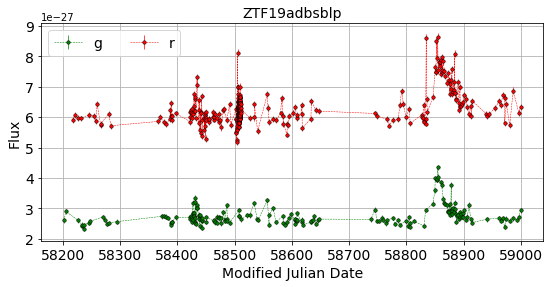

1120


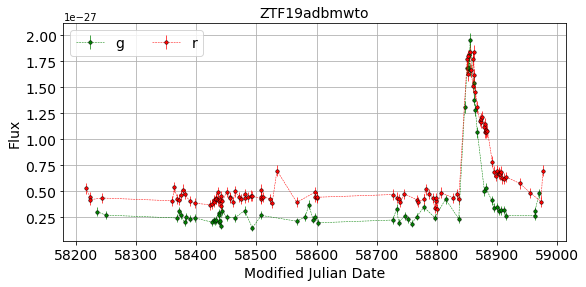

1133


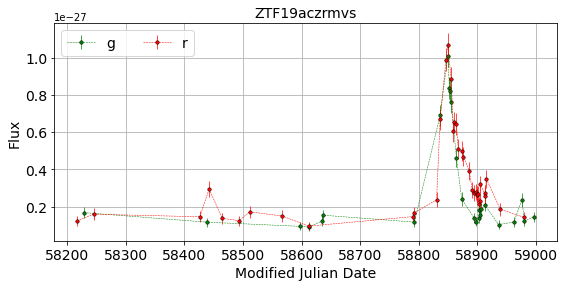

1138


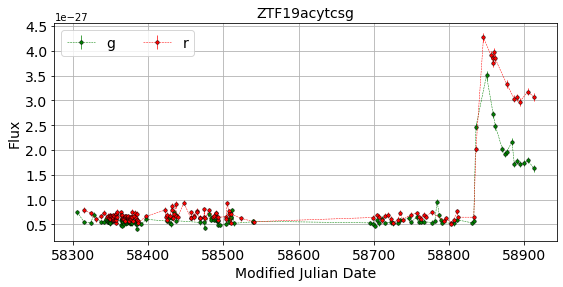

1180


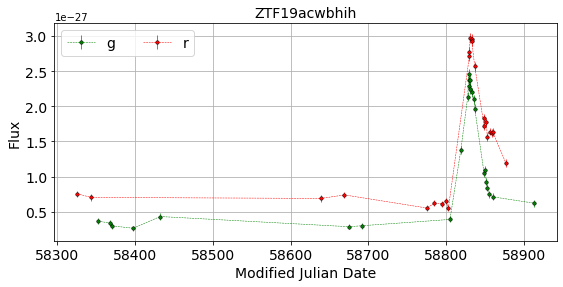

1181


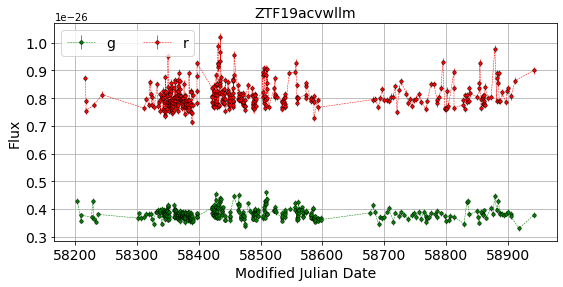

1191


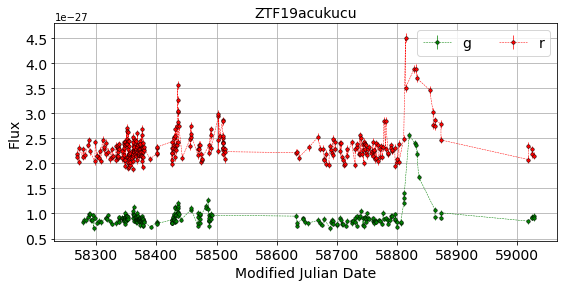

1202


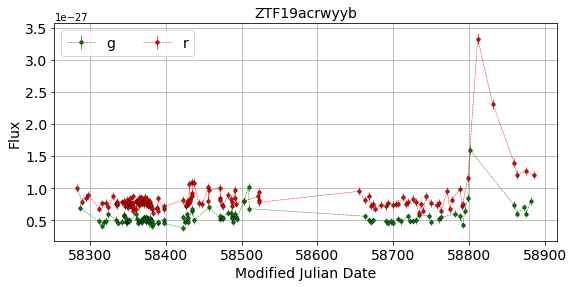

1205


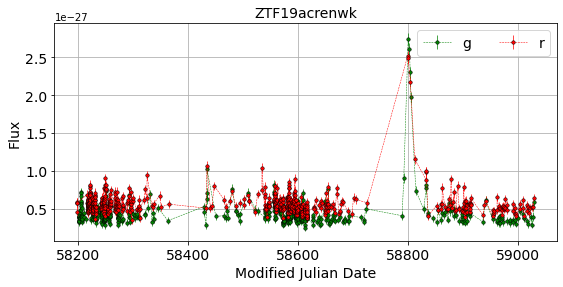

1206


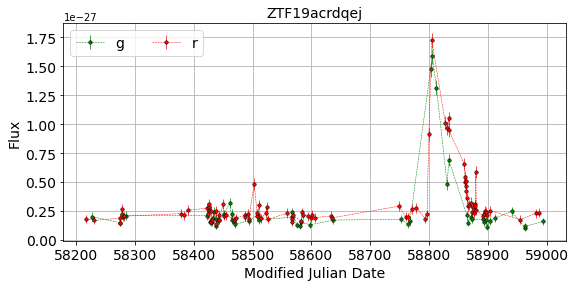

1209


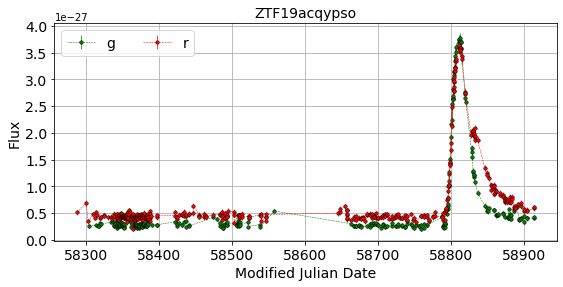

1212


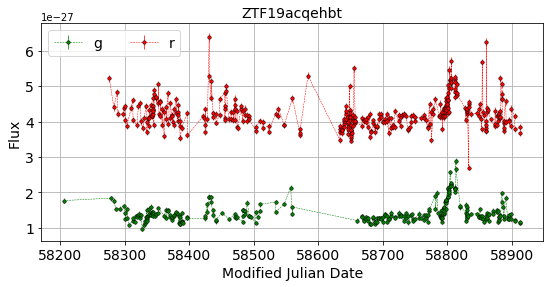

1218


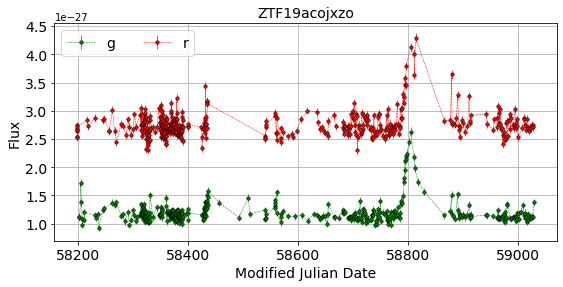

1229


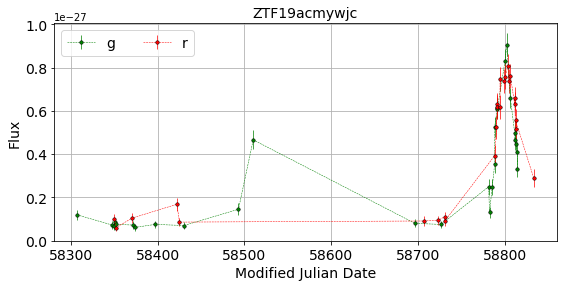

1237


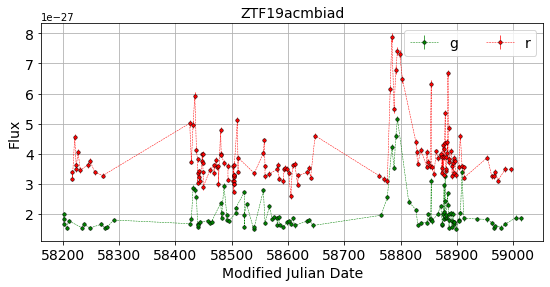

1239


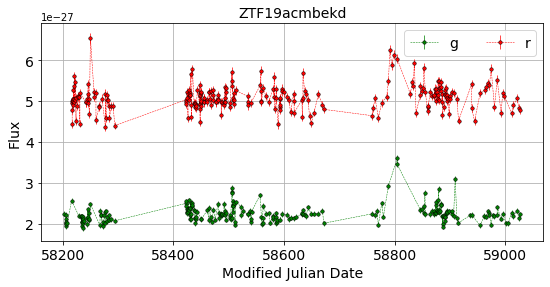

1246


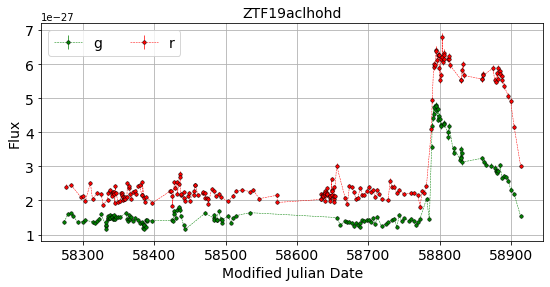

1258


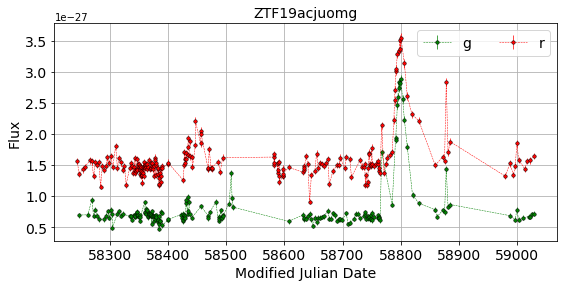

1271


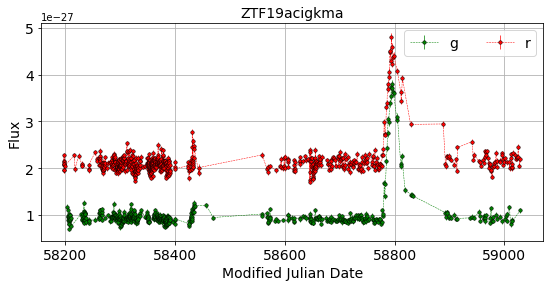

1272


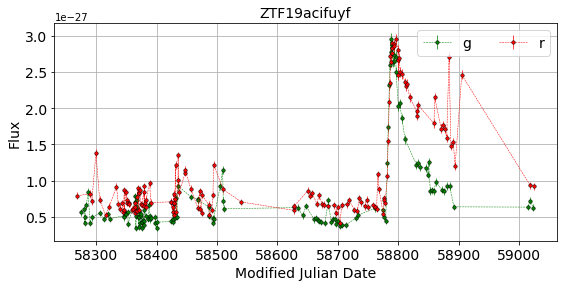

1277


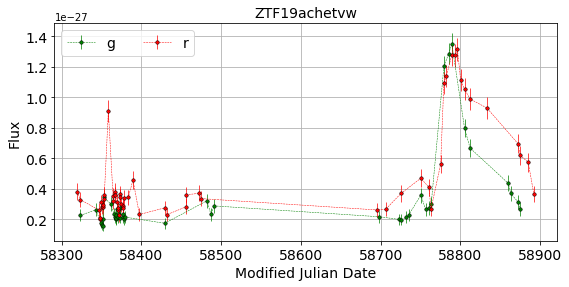

1281


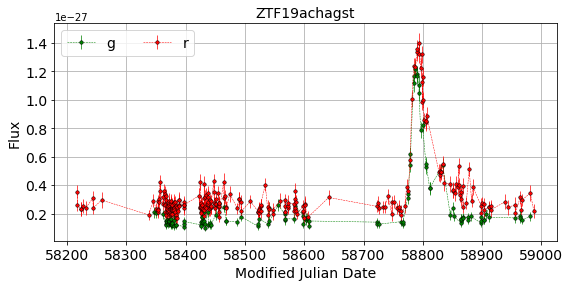

1285


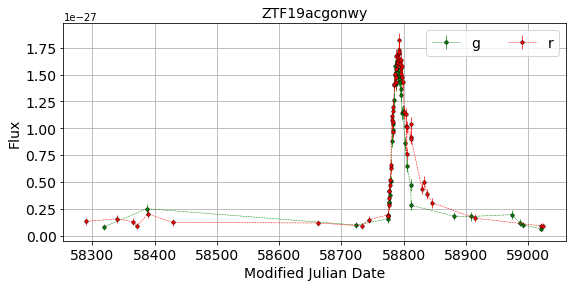

1288


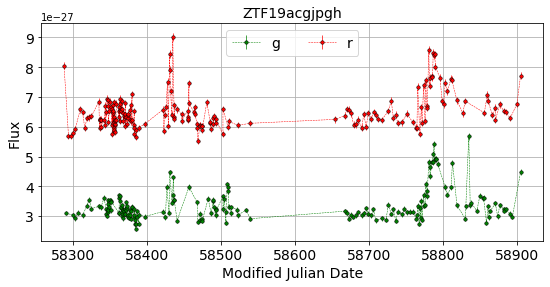

1305


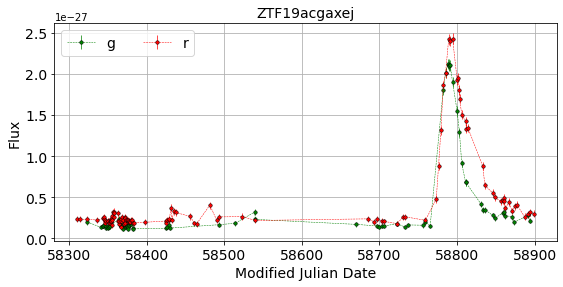

1309


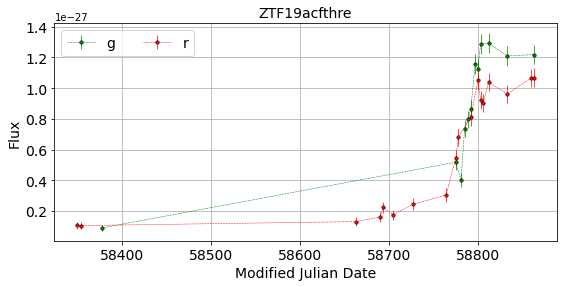

1314


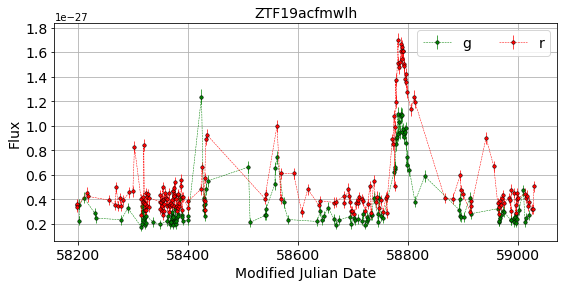

1322


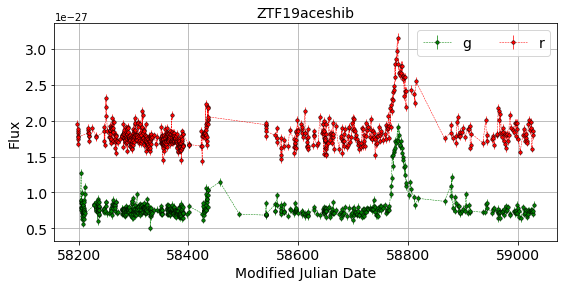

1339


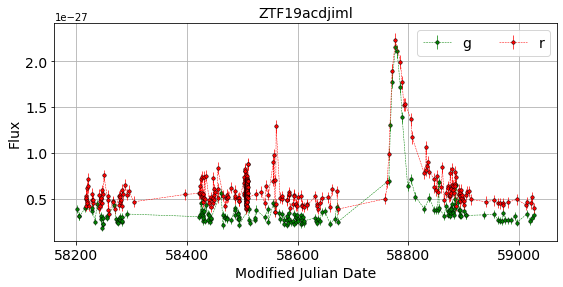

1353


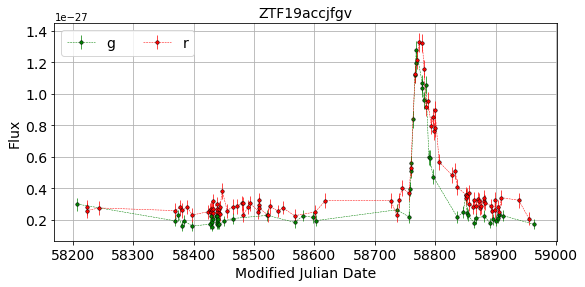

1379


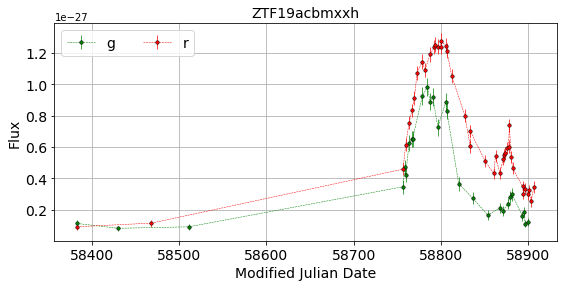

1394


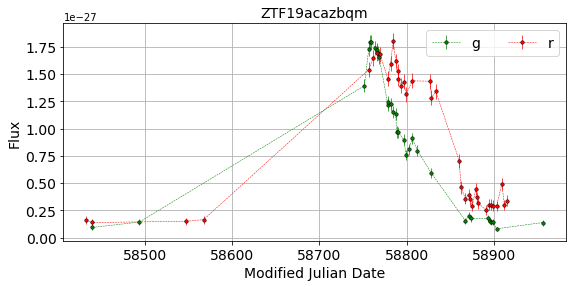

1396


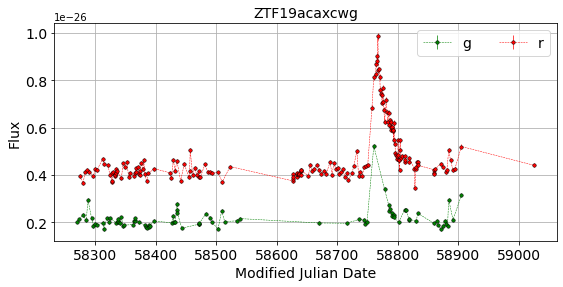

1405


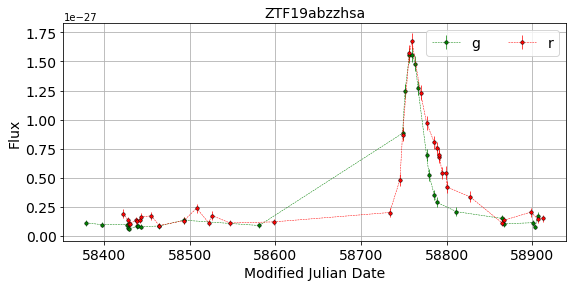

1423


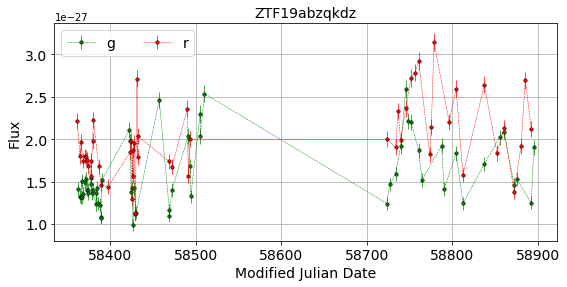

1426


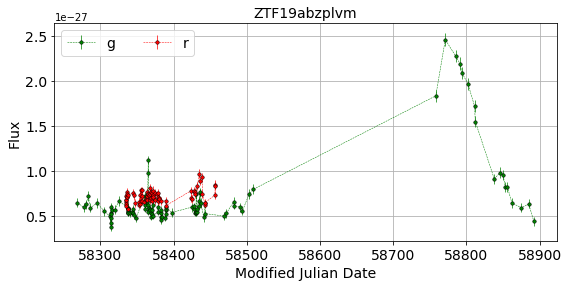

1427


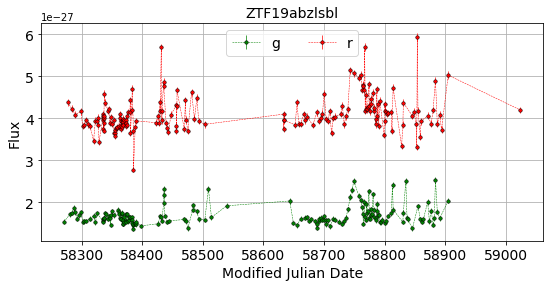

1442


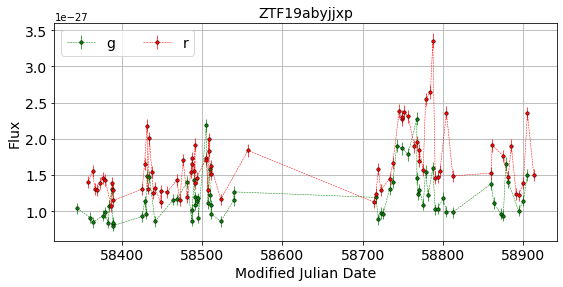

1444


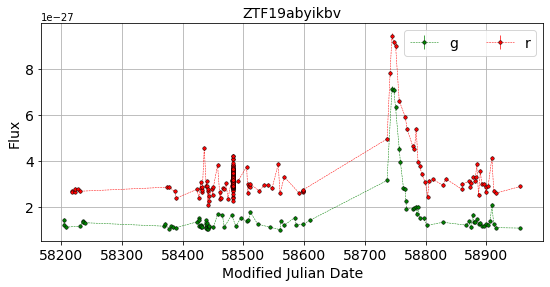

1446


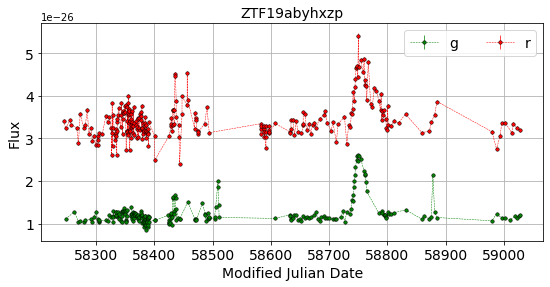

1464


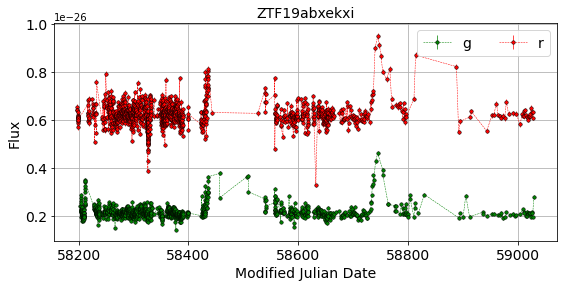

1476


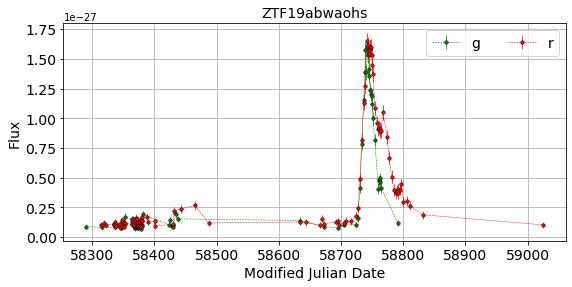

1479


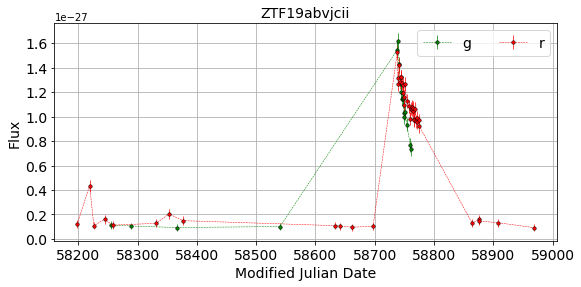

1480


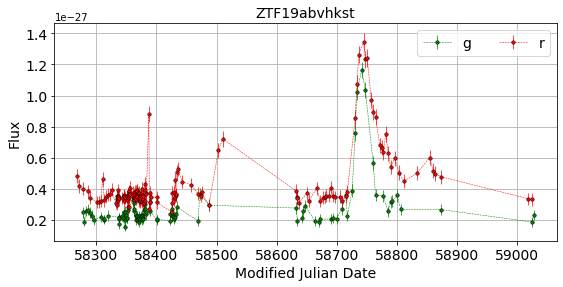

1481


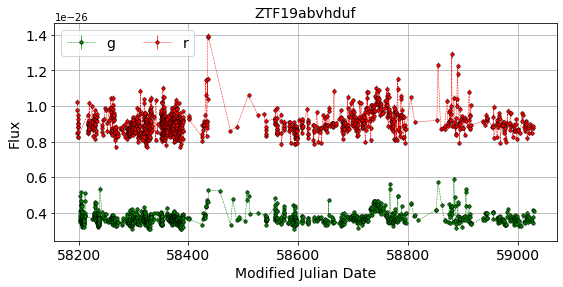

1499


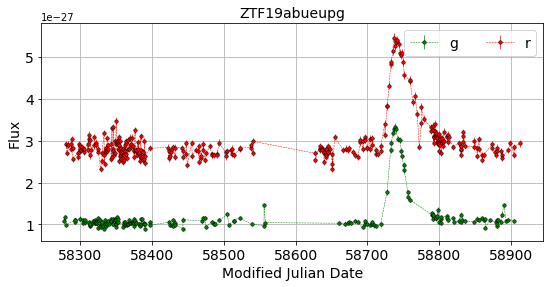

1504


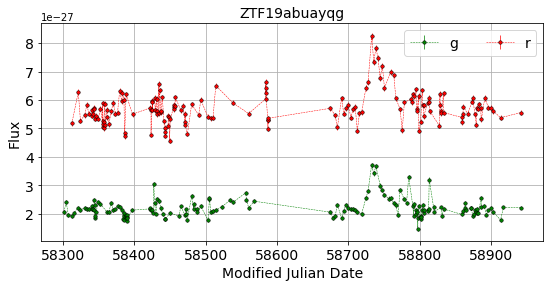

1525


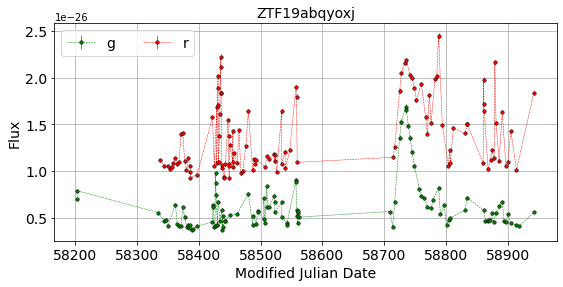

1546


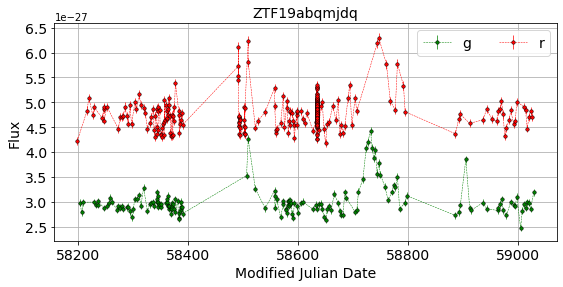

1557


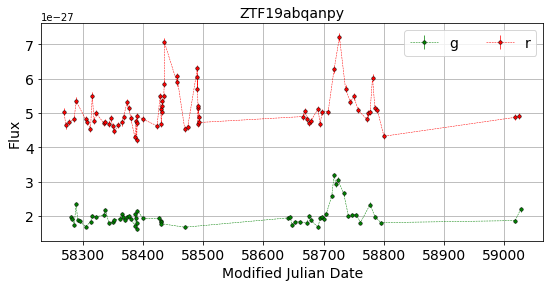

1562


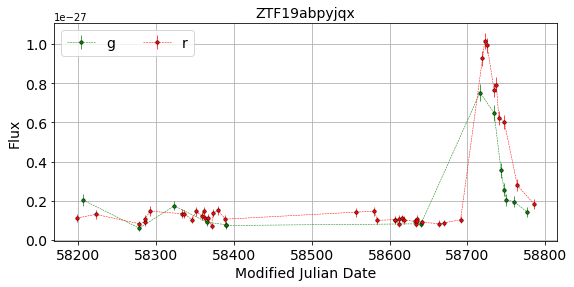

1591


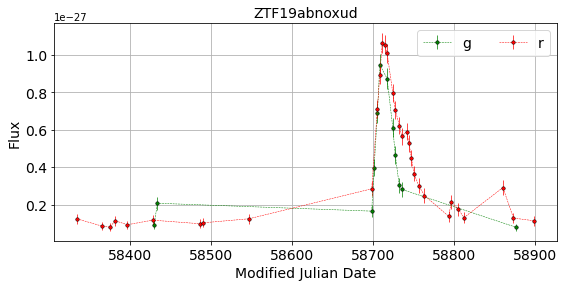

1611


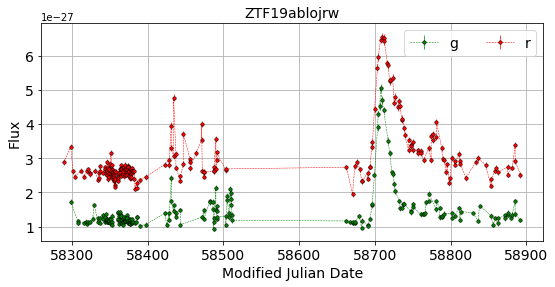

1612


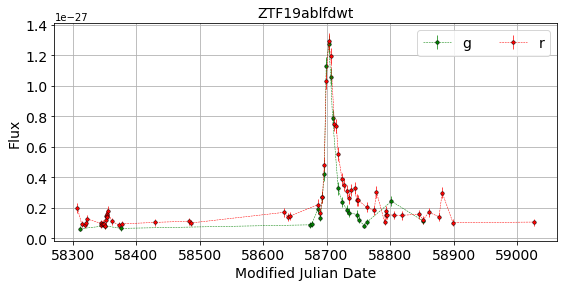

1626


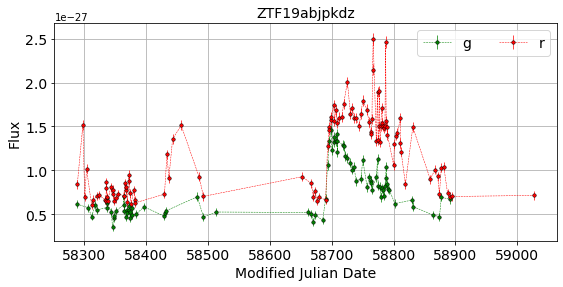

1644


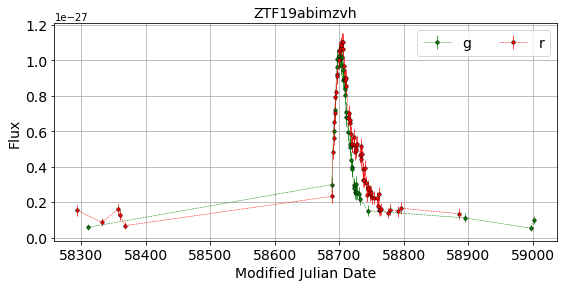

1645


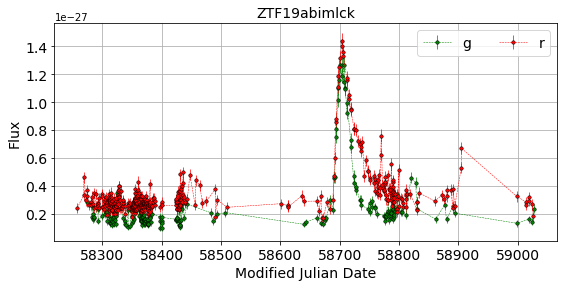

1657


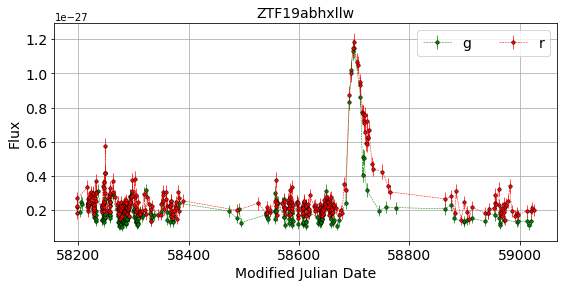

1660


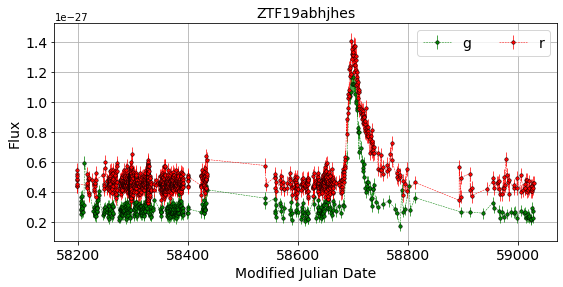

1668


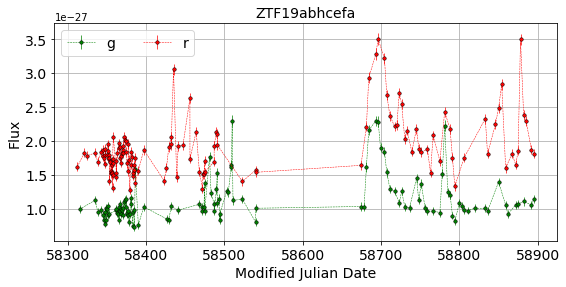

1675


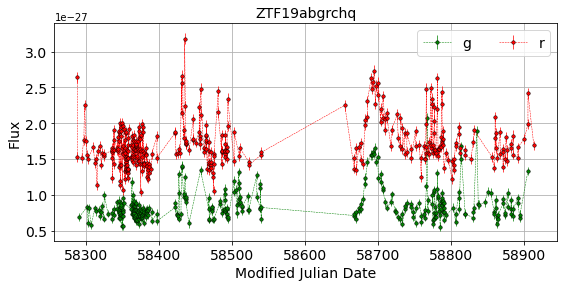

1681


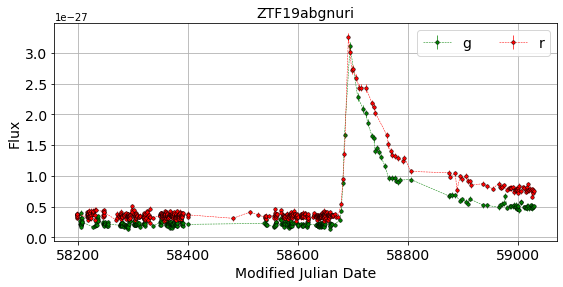

1684


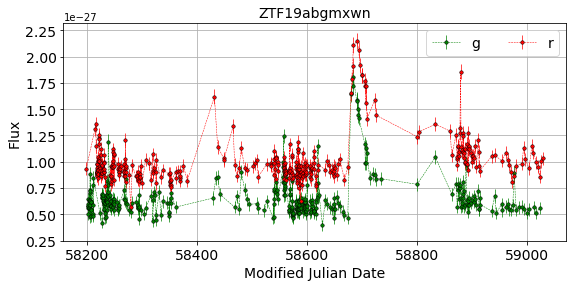

1687


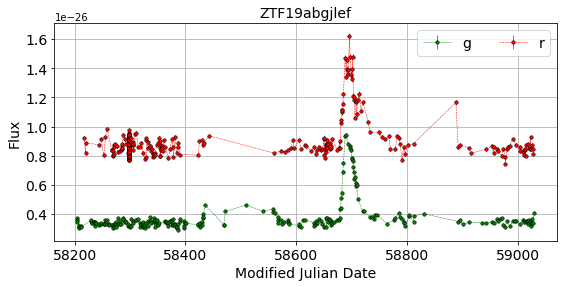

1692


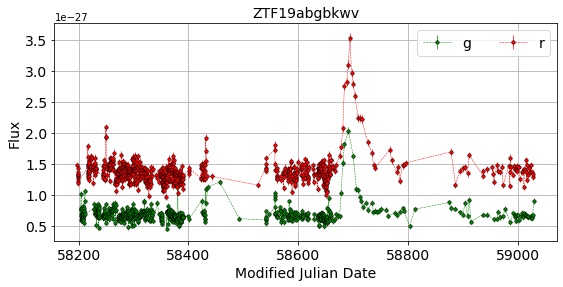

1716


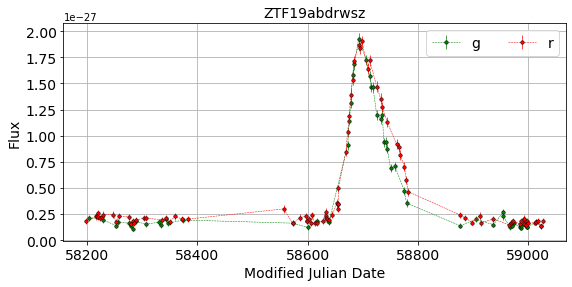

1746


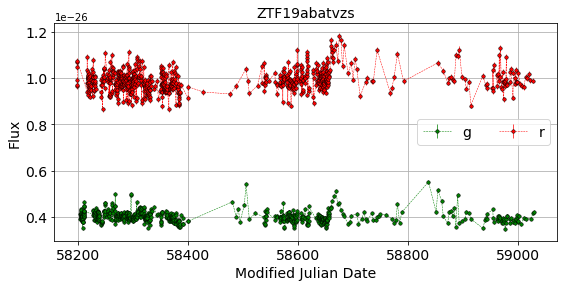

1750


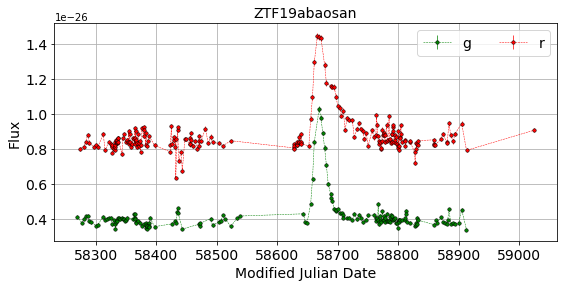

1764


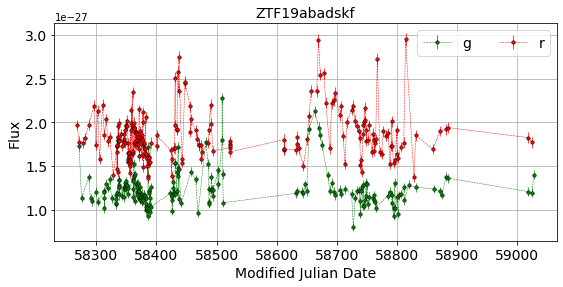

1787


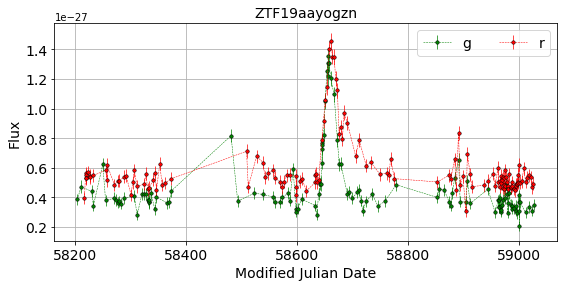

1805


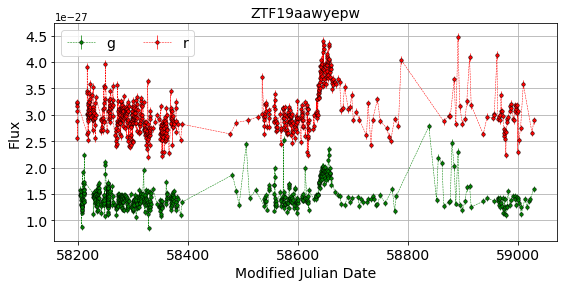

1831


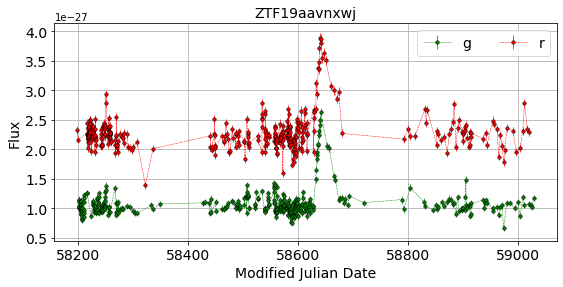

1855


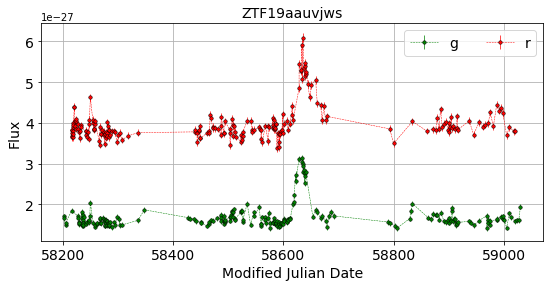

1858


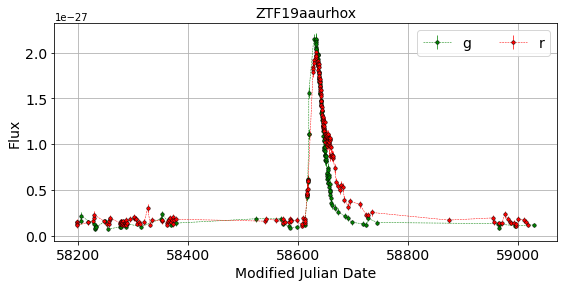

1906


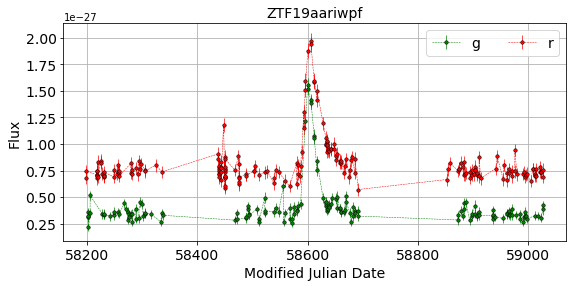

1908


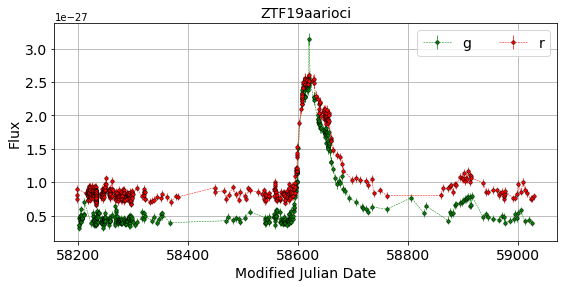

1909


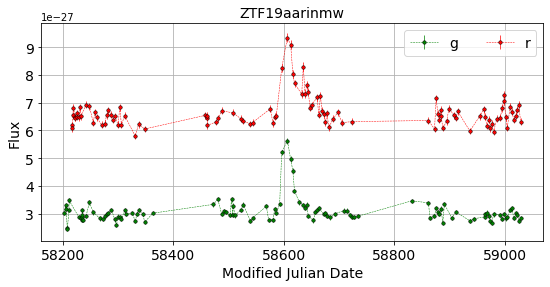

1922


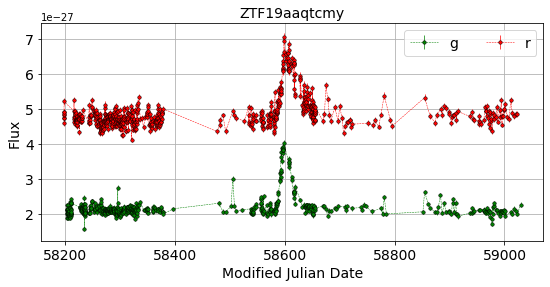

1923


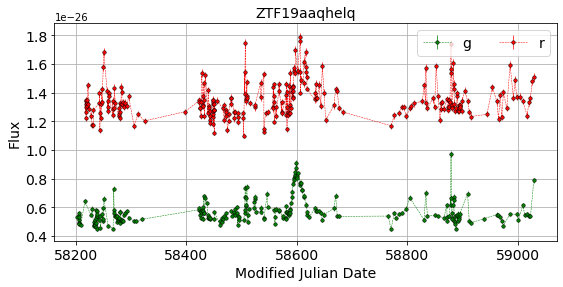

1929


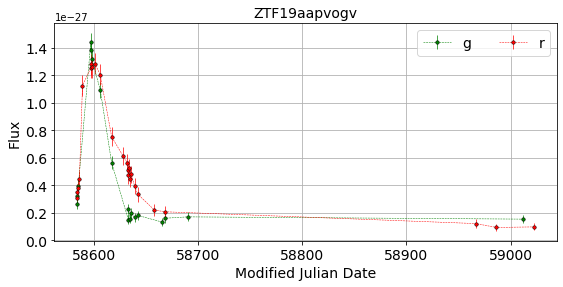

1943


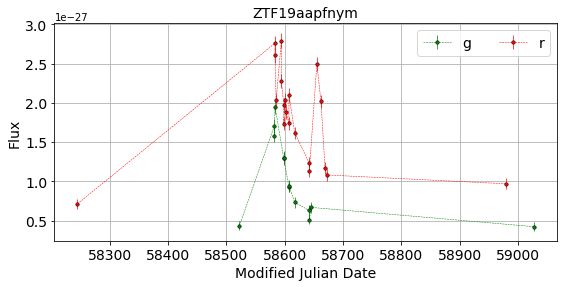

1975


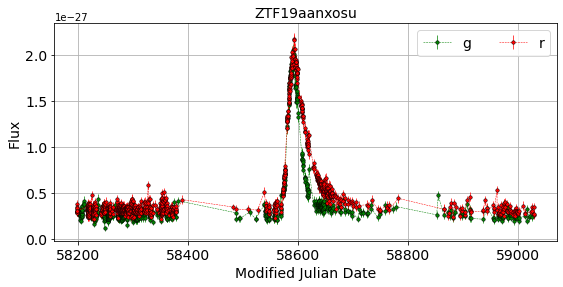

1985


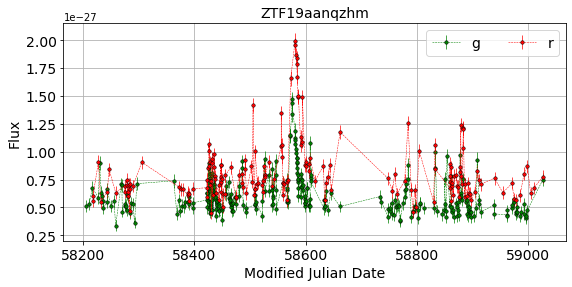

1987


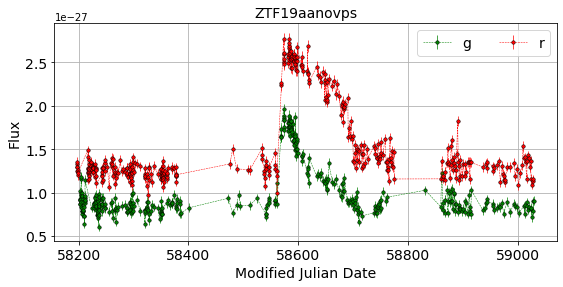

1990


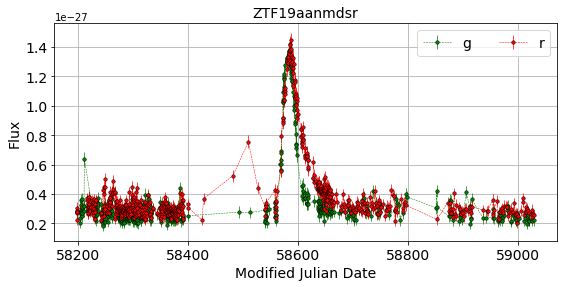

1995


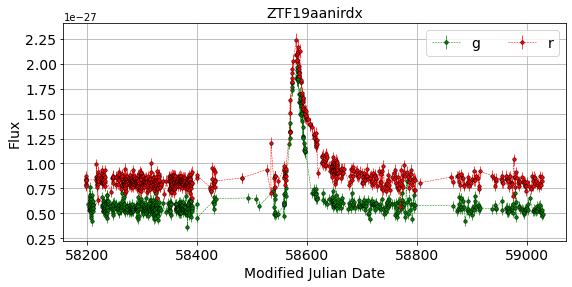

2009


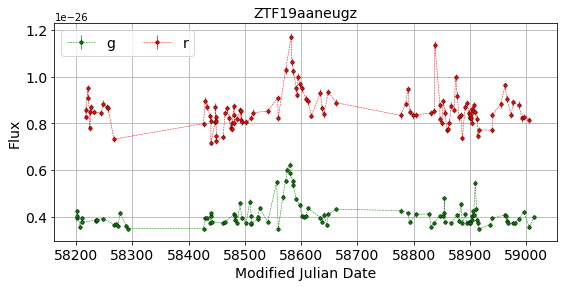

2010


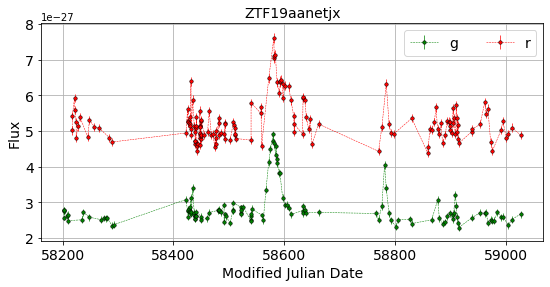

2015


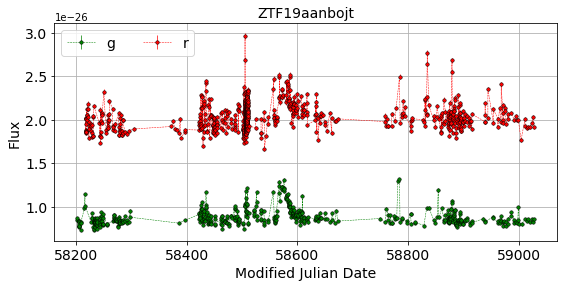

2037


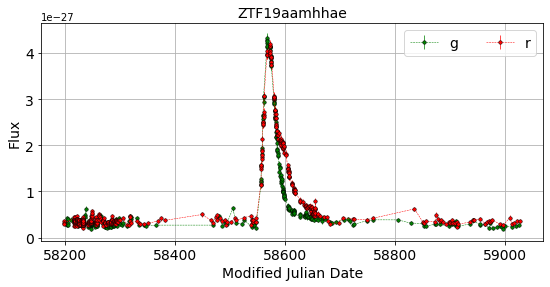

2067


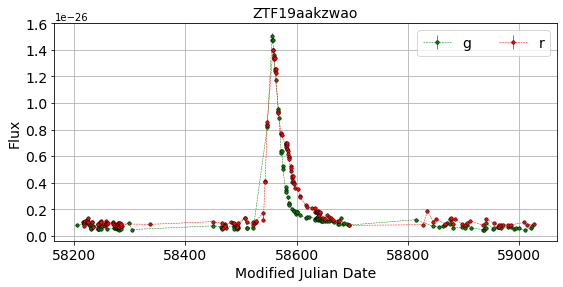

2082


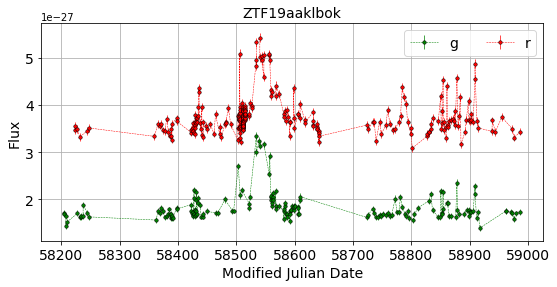

2110


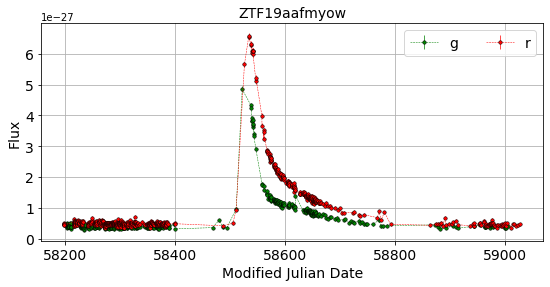

2116


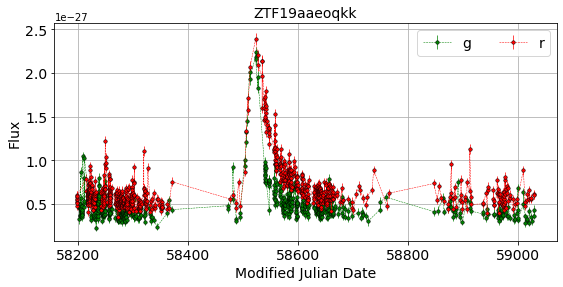

2134


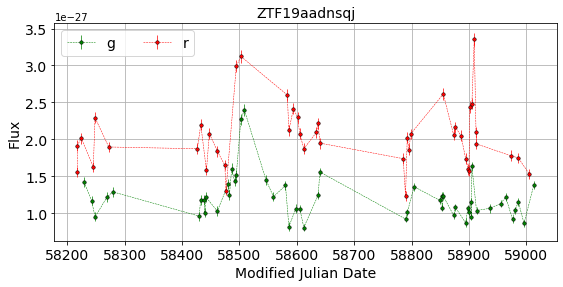

2154


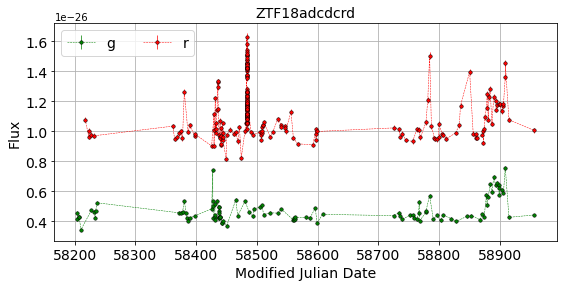

2157


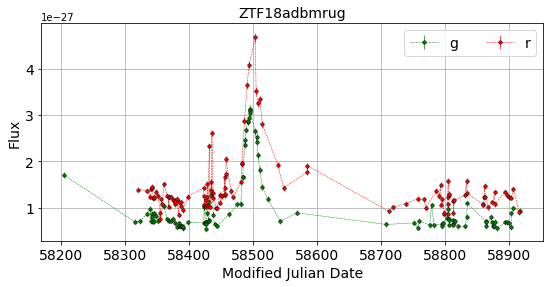

2159


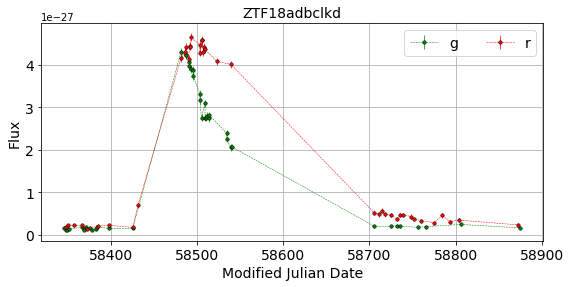

2161


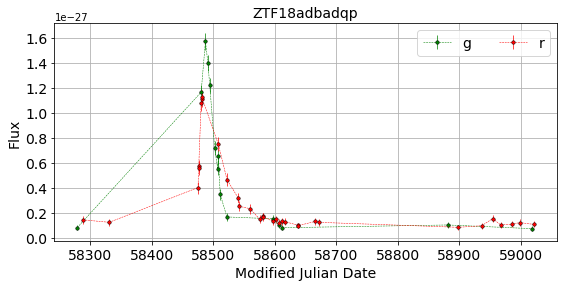

2164


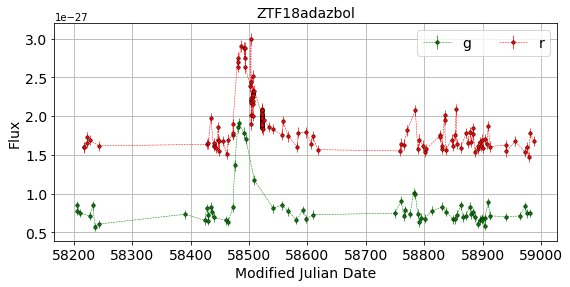

2167


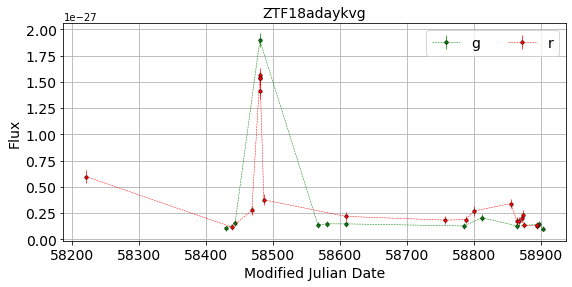

2171


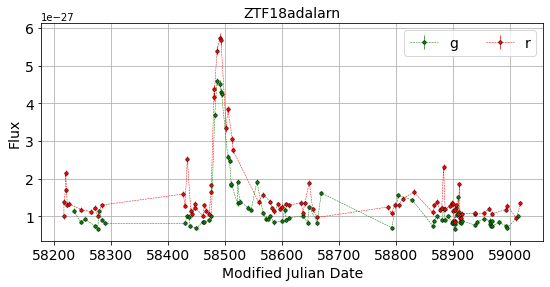

2177


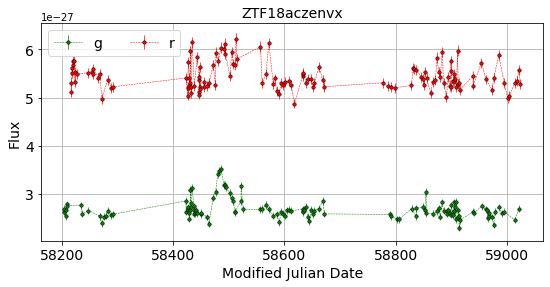

2179


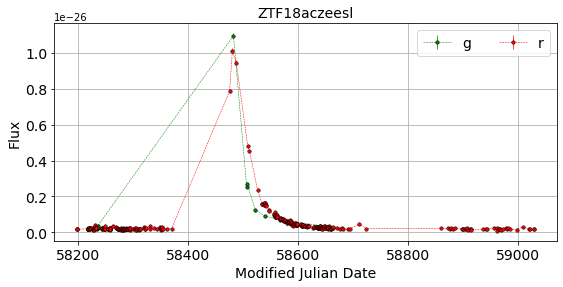

2183


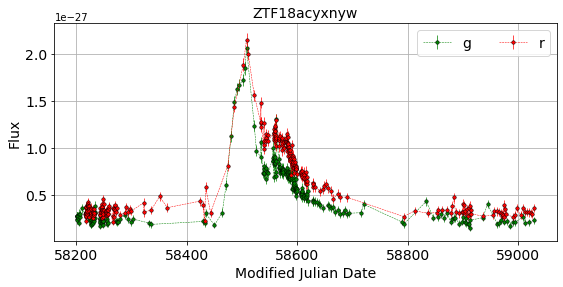

2186


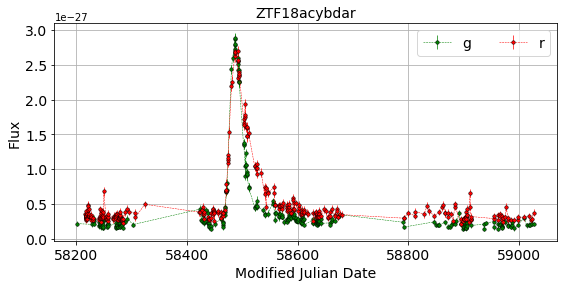

2195


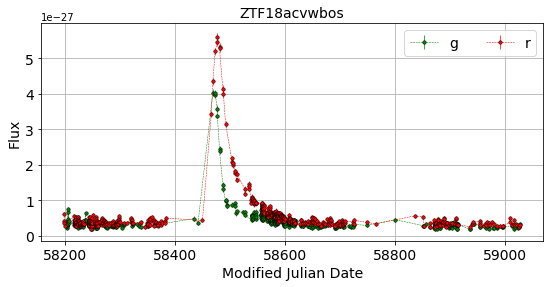

2200


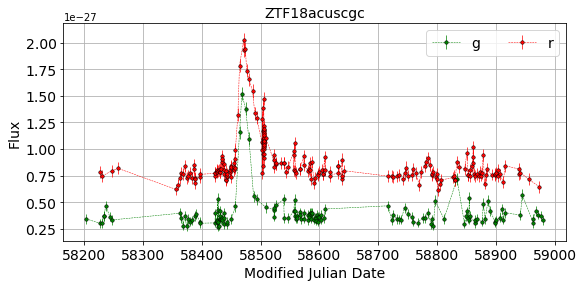

2231


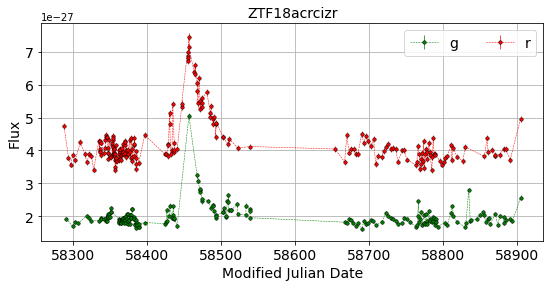

2243


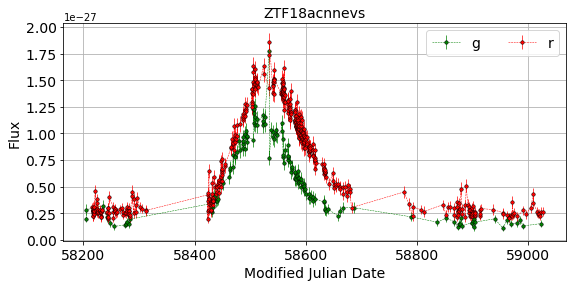

2246


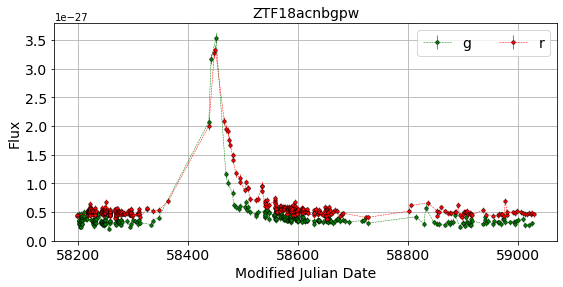

2272


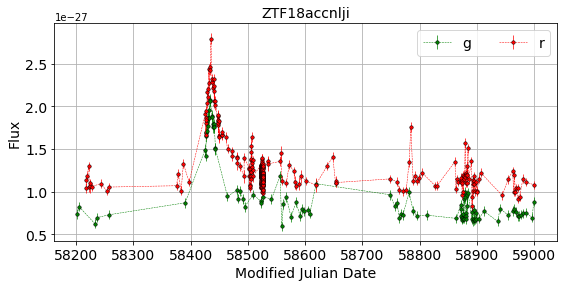

2277


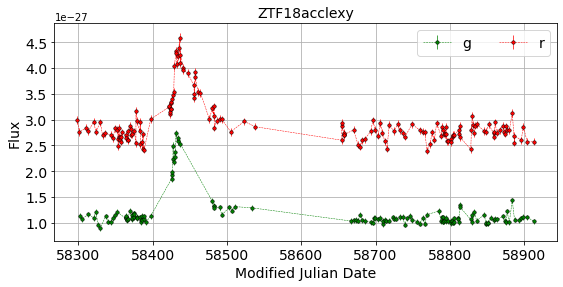

2278


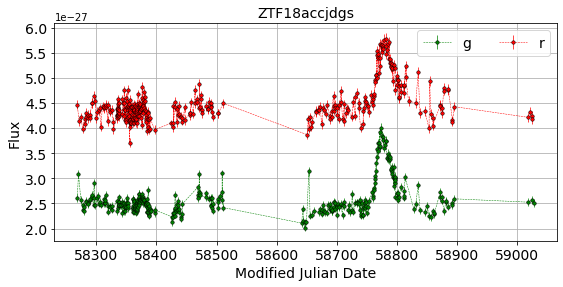

2284


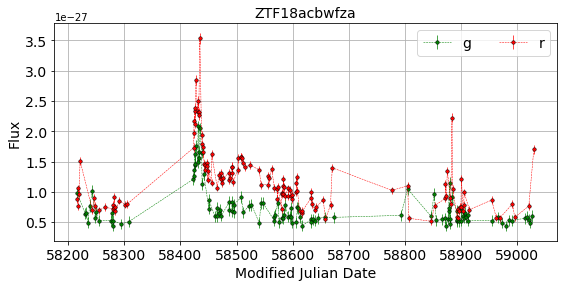

2285


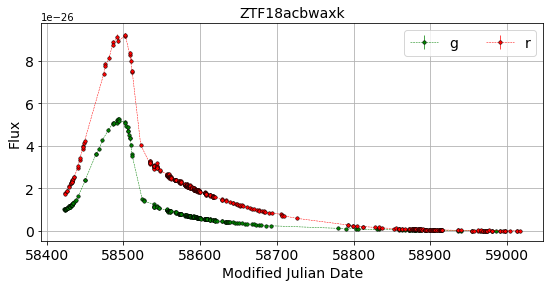

2298


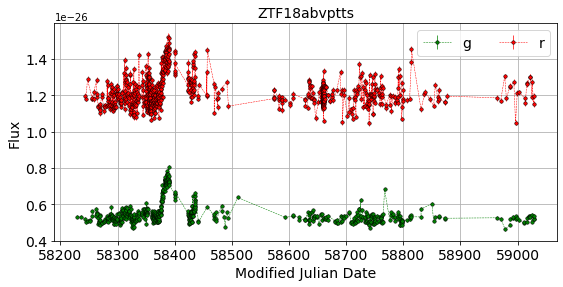

2302


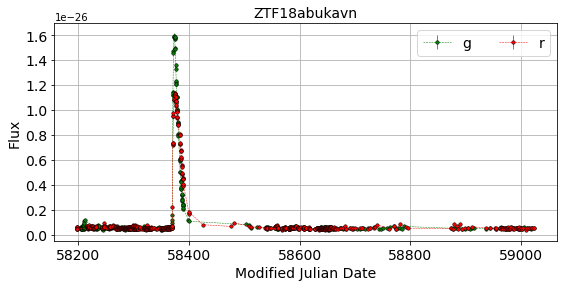

2303


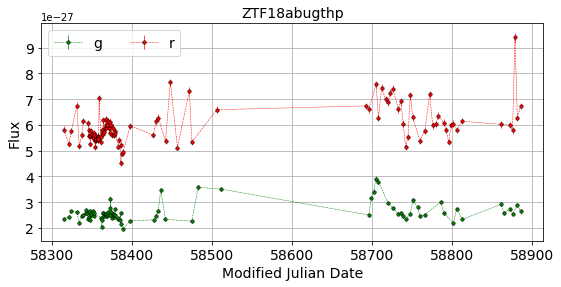

2308


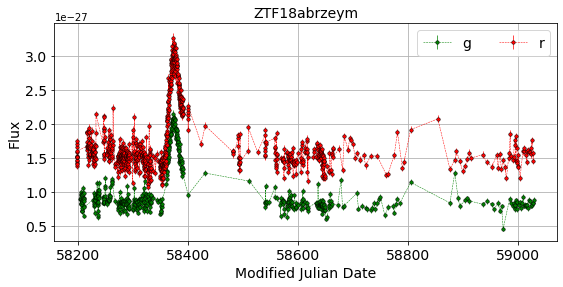

2309


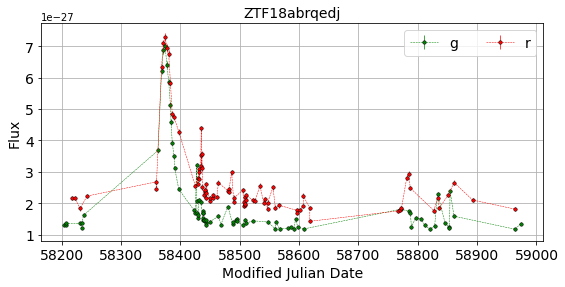

2312


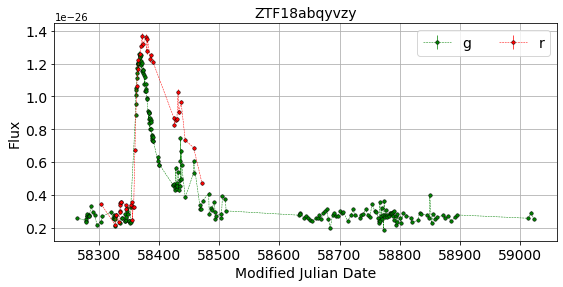

2315


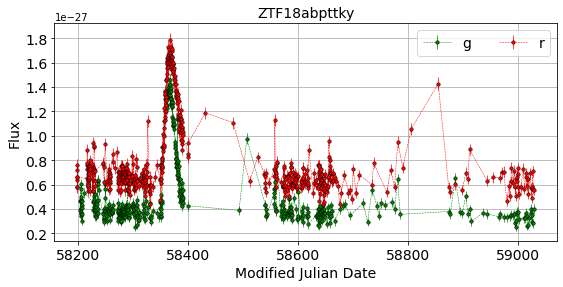

2319


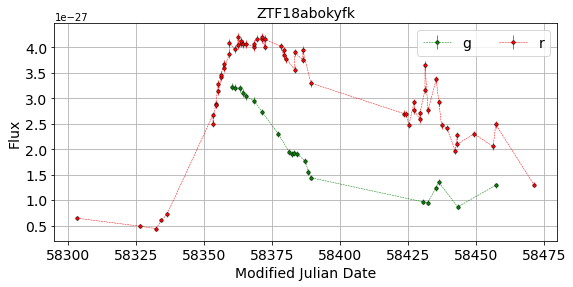

2322


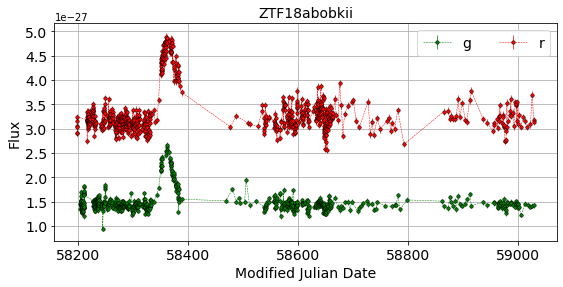

2326


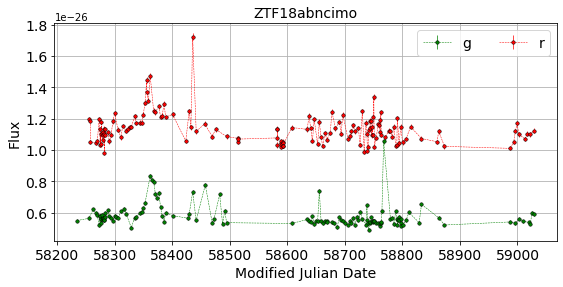

2329


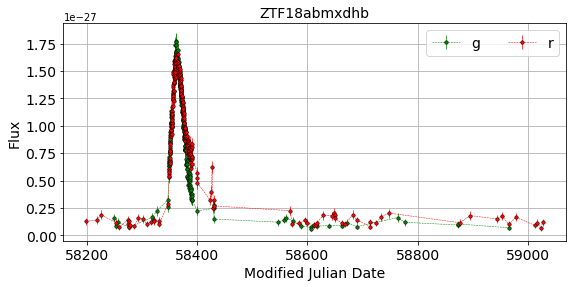

2331


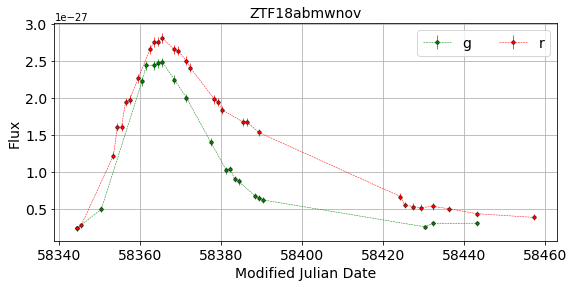

2332


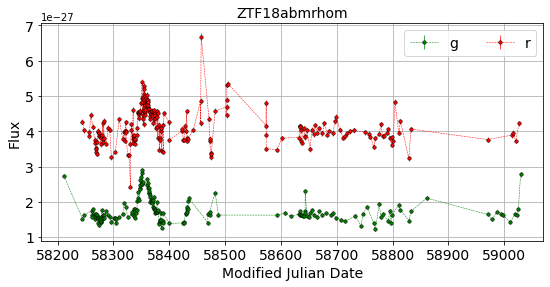

2345


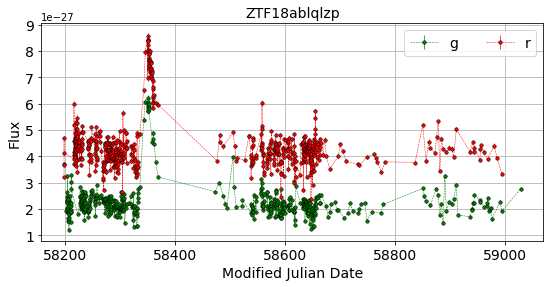

2347


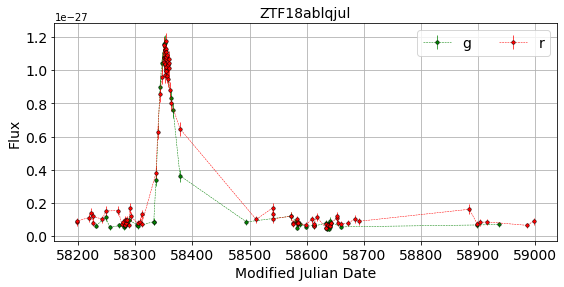

2356


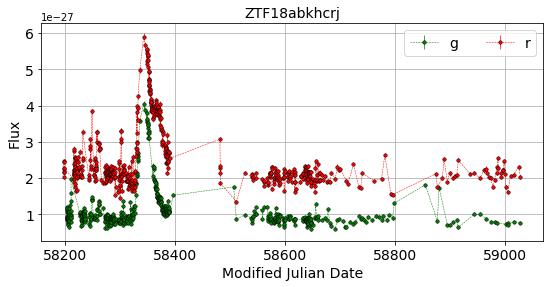

2366


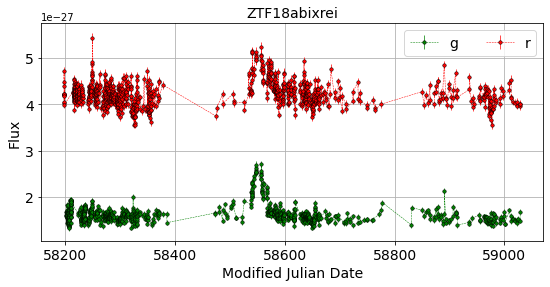

2370


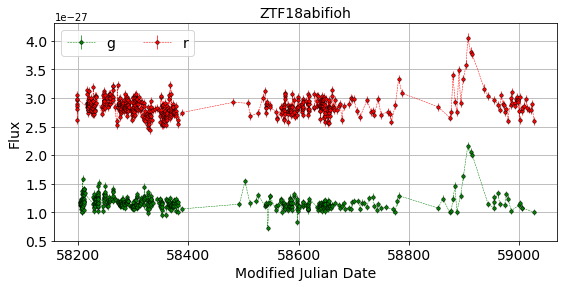

2372


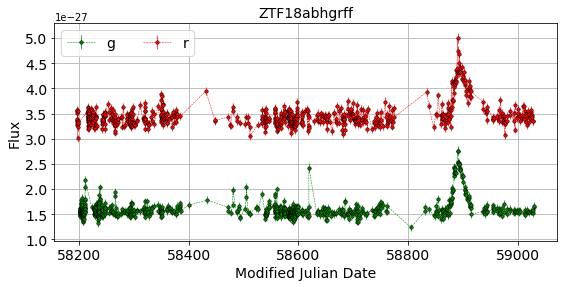

2375


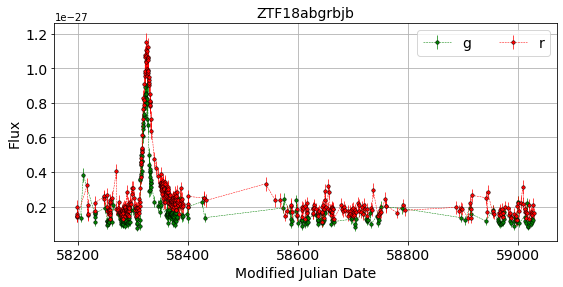

2376


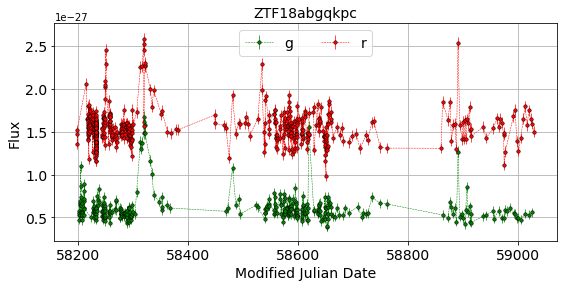

2388


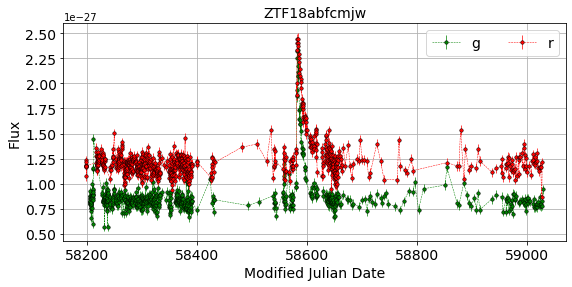

2455


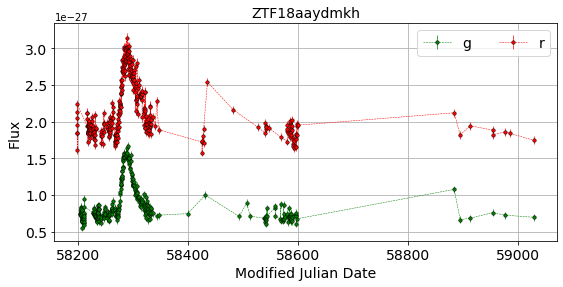

2458


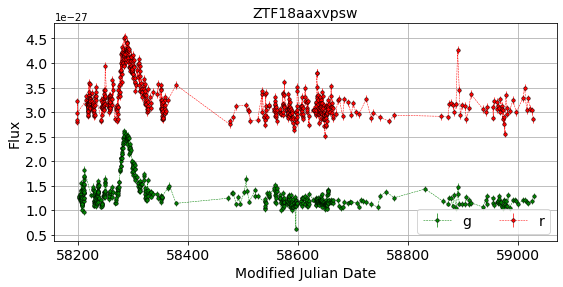

2464


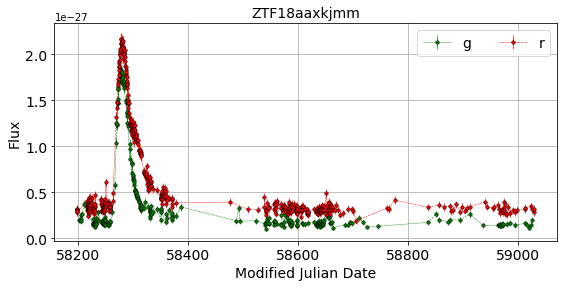

2470


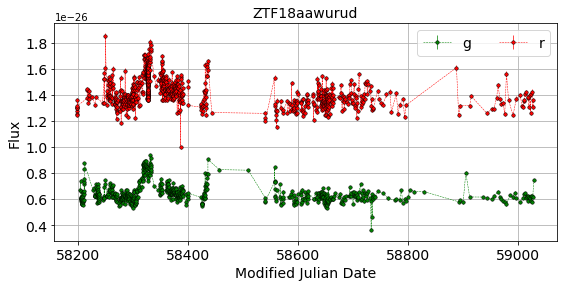

2473


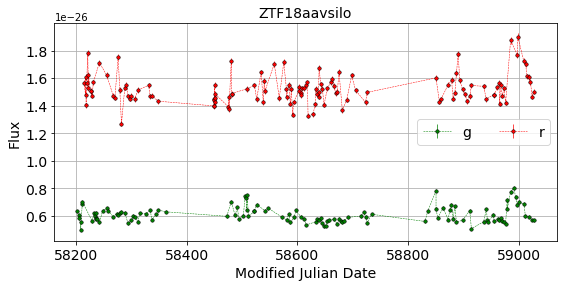

2476


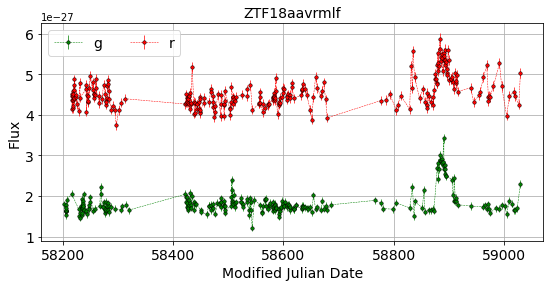

2483


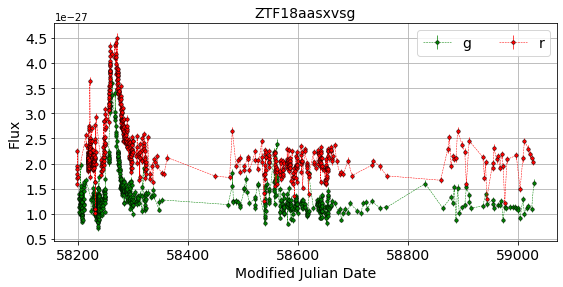

2485


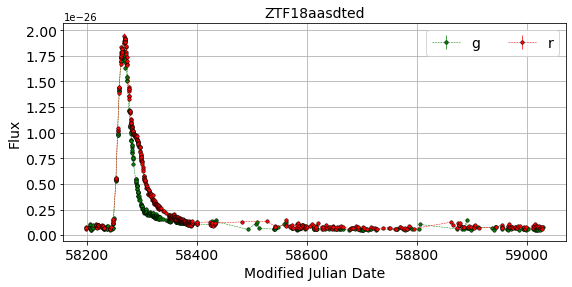

2486


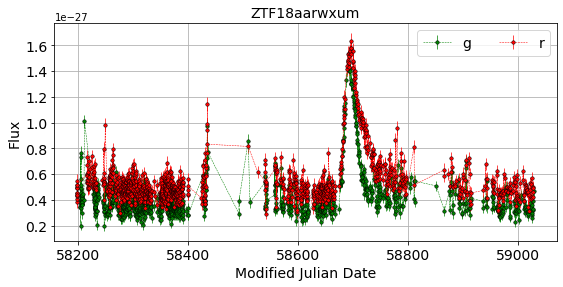

2488


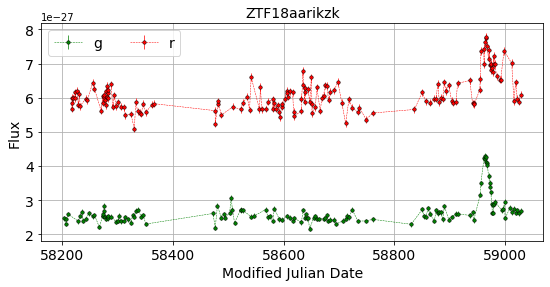

2494


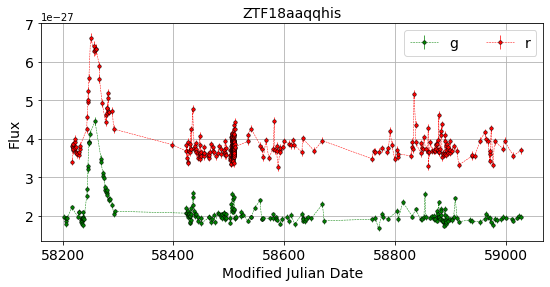

2505


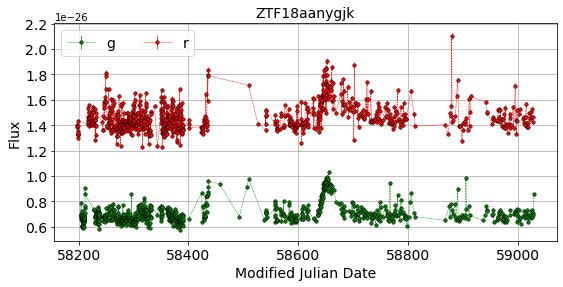

2508


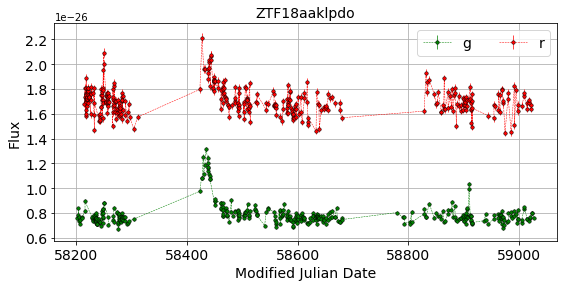

2510


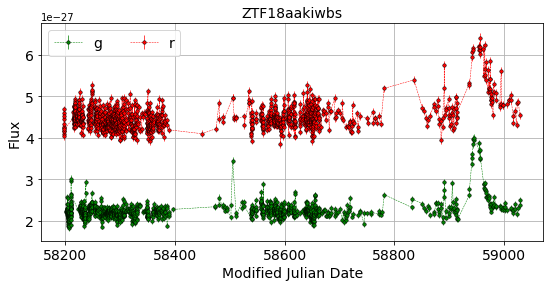

2511


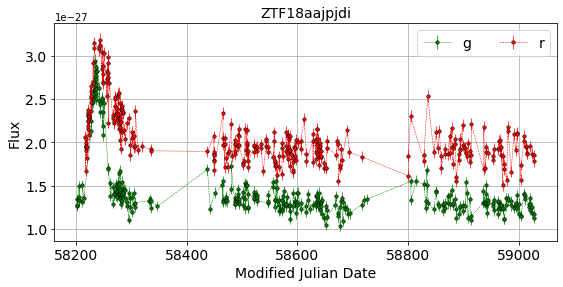

2524


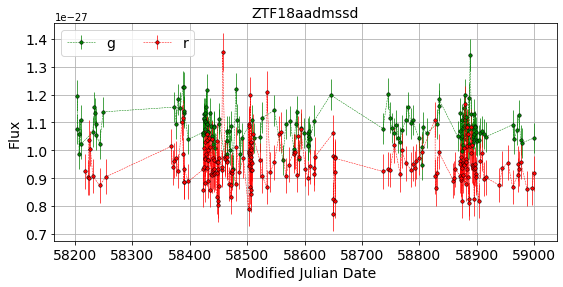

2526


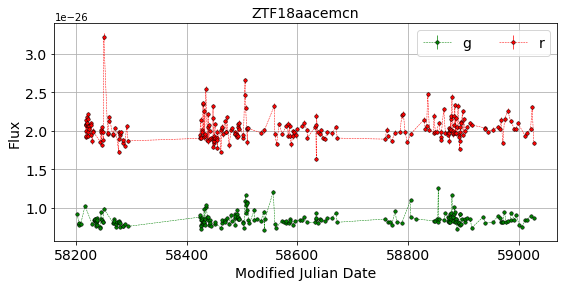

2530


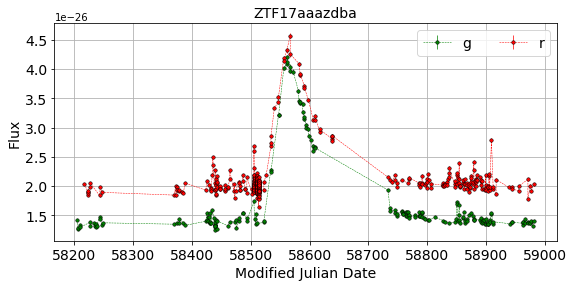

In [9]:
def get_passband(anobject, passband):
    light_curve = anobject[anobject.passband == passband]
    return light_curve

def compile_obj(t, flux, flux_err, passband):
    obj = pd.DataFrame()
    obj['mjd']      = t
    obj['flux']     = flux
    obj['flux_err'] = flux_err
    obj['passband'] = passband
    return obj

def is_good(anobject):
    good = 1
    count = 0
    for passband in range(2):
        if len(get_passband(anobject, passband)) < 10:
            count += 1
    if count > 0:
        good = 0
    # keep only objects without large breaks in observations
    anobject = anobject.sort_values('mjd')
    mjd = anobject['mjd'].values
    if np.diff(mjd, 1).max() > 1000:
        good = 0
    
    return good

def plot_light_curves(anobject, title=""):
    anobject = anobject.sort_values('mjd')
    plt.figure(figsize=(9, 4))
    for passband in range(2):
        light_curve = get_passband(anobject, passband)
        plt.errorbar(light_curve['mjd'].values, light_curve['flux'].values, \
                     yerr=light_curve['flux_err'].values, linewidth=0.5, \
                     marker='o', elinewidth=0.7 ,markersize=3.50, \
           markeredgecolor='black', markeredgewidth=0.50, \
                     fmt='o--', color=color[passband], label=color[passband][0])

    plt.xlabel('Modified Julian Date', size=14)
    plt.xticks(size=14)
    plt.ylabel('Flux', size=14)
    plt.yticks(size=14)
    plt.grid()
    plt.legend(loc='best', ncol=3, fontsize=14)
    plt.title(title, size=14)

for i in numbers:
    name = bts_ztf_ids[i]
    anobject = get_object(data, name)
    
    if not is_good(anobject): 
        continue
        
    print(i)
    
    plot_light_curves(anobject, name)
    plt.show()

# One-object test

In [10]:
# import sys
# sys.path.append('light_curve_approx-main/notebooks/')

(958, 26)


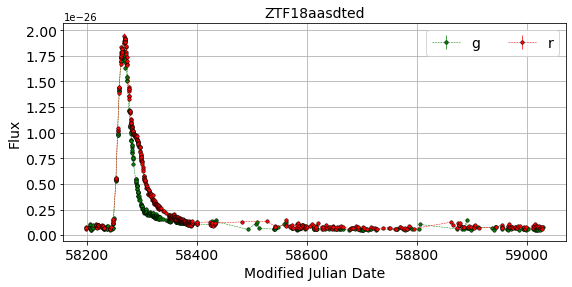

In [23]:
from sklearn.model_selection import train_test_split
import gp_aug


anobject = get_object(data, 'ZTF18aasdted')
anobject = anobject[(anobject['passband'] == 0)|(anobject['passband'] == 1)]
print(anobject.shape)
plot_light_curves(anobject, 'ZTF18aasdted')


anobject_train, anobject_test = train_test_split(anobject, test_size=0.5, random_state=11)

In [24]:
# fit augmentation model
from gp_aug import GaussianProcessesAugmentation
model = gp_aug.GaussianProcessesAugmentation(passband2lam)
model.fit(anobject_train['mjd'].values, anobject_train['flux'].values, 
          anobject_train['flux_err'].values, anobject_train['passband'].values)

# predict flux for unseen observations
flux_pred, flux_err_pred = model.predict(anobject_test['mjd'].values, \
                                        anobject_test.passband, copy=True)
print(anobject['mjd'].min(), anobject['mjd'].max())
# augmentation
t_aug, flux_aug, flux_err_aug, passband_aug = model.augmentation(anobject['mjd'].min(), 
                                                                 anobject['mjd'].max(), n_obs=1957)

anobject_test_pred = compile_obj(anobject_test['mjd'].values, flux_pred, 
                                  flux_err_pred, anobject_test['passband'].values)
anobject_aug = compile_obj(t_aug, flux_aug, flux_err_aug, passband_aug)

58198.4009606 59029.2626736


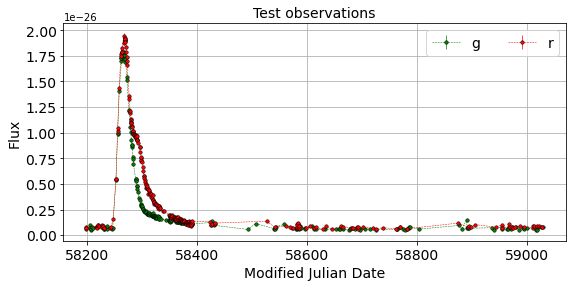

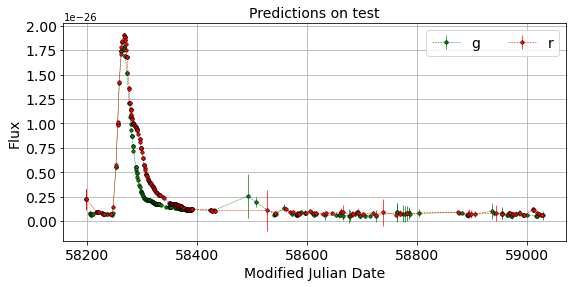

In [25]:
plot_light_curves(anobject_test, "Test observations")
plot_light_curves(anobject_test_pred, "Predictions on test")

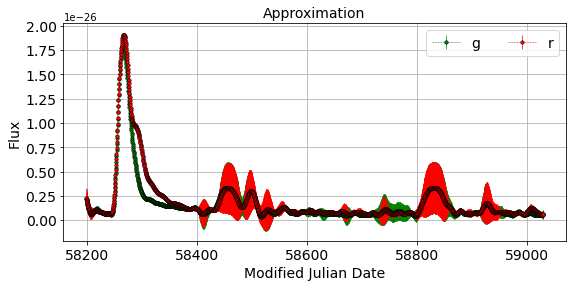

In [26]:
plot_light_curves(anobject_aug, "Approximation")

In [15]:
import utils
from utils import regression_quality_metrics_report


# calculate quality metrics
[rmse, mae, rse, rae, mape] = utils.regression_quality_metrics_report(anobject_test['flux'].values, 
                                                                      anobject_test_pred['flux'].values)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("RSE: ", rse)
print("RAE: ", rae)
print("MAPE: ", mape)

RMSE:  2.1890706688819452e-28
MAE:  1.2473553824428865e-28
RSE:  0.04619607495757874
RAE:  0.035994746478764536
MAPE:  9.93776354647639


# Test on many object

In [16]:
from tqdm import tqdm


report = pd.DataFrame(columns=["ID", 'RMSE', 'MAE', 'RSE', 'RAE', 'MAPE'])

object_ids = []

for i in numbers:
    name = bts_ztf_ids[i]
    object_ids.append(name)
object_ids = np.array(object_ids, dtype='object')

for i in tqdm(object_ids):
    
    # get an object
    anobject = get_object(data, i)
    
    if not is_good(anobject): continue
    
    #print("Object ", i, " with ", len(anobject), " observations")
    
    # train / test split
    anobject_train, anobject_test = train_test_split(anobject, test_size=0.5, random_state=11)
    
    # fit augmentation model
    model = gp_aug.GaussianProcessesAugmentation(passband2lam)
    model.fit(anobject_train['mjd'].values, anobject_train['flux'].values, 
              anobject_train['flux_err'].values, anobject_train['passband'].values)

    # predict flux for unseen observations
    flux_pred, flux_err_pred = model.predict(anobject_test['mjd'].values, \
                                             anobject_test['passband'].values, copy=True)
    
    metrics = utils.regression_quality_metrics_report(anobject_test['flux'].values, flux_pred)
    report.loc[len(report), :] = [i] + list(metrics)

 42%|████▏     | 80/192 [04:12<10:44,  5.76s/it]/home/masha/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
 58%|█████▊    | 112/192 [07:27<05:33,  4.17s/it]/home/masha/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
 64%|██████▎   | 122/192 [08:47<12:44, 10.92s/it]/home/masha/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2

In [17]:
type(report.columns[1])

str

In [18]:
report

ID         RMSE          MAE       RSE       RAE     MAPE
0    ZTF20abewogd  1.73755e-28  1.31184e-28  0.158331  0.121558  5.22399
1    ZTF20abefbpl  4.26328e-28  2.79883e-28  0.308715  0.214104  7.41127
2    ZTF20abeeytg  4.18213e-28  3.18678e-28  0.240536  0.191263  8.95191
3    ZTF20abdxffu  9.08924e-29   6.2525e-29  0.385323  0.445906    12.37
4    ZTF20abchhuw   4.8835e-29  3.38175e-29   0.22376  0.235231  32.6642
..            ...          ...          ...       ...       ...      ...
187  ZTF18aakiwbs  1.93562e-28  1.38467e-28  0.165473   0.12129  4.16086
188  ZTF18aajpjdi  1.47436e-28  1.12792e-28  0.320514  0.293588  6.46854
189  ZTF18aadmssd  6.25224e-29  4.76864e-29  0.692803  0.623995  4.81601
190  ZTF18aacemcn  1.23068e-27   8.2984e-28  0.206136  0.142217  5.77233
191  ZTF17aaazdba  1.21588e-27  8.23085e-28  0.226729  0.251678  4.20658

[192 rows x 6 columns]

In [19]:
for i in report.columns[1:].values:
    print('Среднее значение метрики ' + i + ' {}'.format(np.round(np.nanmean(report[i].values), 3)))
    print('Медианное значение метрики ' + i + ' {}'.format(np.round(np.median(report[i].values), 3)))
    print('Минимальное значение метрики ' + i + ' {}'.format(np.round(np.nanmin(report[i].values), 3)))
    print('Максимальное значение метрики ' + i + \
          ' {}'.format(np.round(np.nanmax(report[i].values), 3)), end='\n\n')

Среднее значение метрики RMSE 0.0
Медианное значение метрики RMSE 0.0
Минимальное значение метрики RMSE 0.0
Максимальное значение метрики RMSE 0.0

Среднее значение метрики MAE 0.0
Медианное значение метрики MAE 0.0
Минимальное значение метрики MAE 0.0
Максимальное значение метрики MAE 0.0

Среднее значение метрики RSE 0.316
Медианное значение метрики RSE 0.264
Минимальное значение метрики RSE 0.028
Максимальное значение метрики RSE 1.3

Среднее значение метрики RAE 0.284
Медианное значение метрики RAE 0.227
Минимальное значение метрики RAE 0.022
Максимальное значение метрики RAE 1.159

Среднее значение метрики MAPE 17.196
Медианное значение метрики MAPE 10.718
Минимальное значение метрики MAPE 3.73
Максимальное значение метрики MAPE 185.856

